# Embeddings

### Curso Intermedio de Aprendizaje Automático

**Vanessa Gómez Verdejo, Emilio Parrado Hernández,  Pablo Martínez Olmos**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

In [1]:
%matplotlib inline
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'retina'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Introducción

Un *embedding* es una representación vectorial de nuestros datos en un espacio de dimensión relativamente bajo. La representación mediante *embeddings* suele utilizarse para facilitar el aprendizaje de modelos cuando se tienen que manejar datos categóricos o conceptos cuya codificación suele llevar a representaciones *sparse* de alta dimensión, como pueden ser codificaciones one-hot encoding de variables categóricas estandar,  representaciones BoW o TF-IDF de documentos o los *ratings* con que un usuario ha puntuado a un conjunto de películas  en un sistema de recomendación.

Así, por ejemplo, una codificación one-hot de paises y ciudades nos llevaría a vectores de este tipo:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/Embeddings/OneHotEncoding.png" width="40%">


Al utilizar este tipo de representaciones en un sistema de aprendizaje automático nos encontramos varias limitaciones:
* Por un lado, trabajar con un espacio de muy alta dimensión implica entrenar un modelo con muchos parámetros, lo que a su vez conlleva un mayor coste computacional, riesgo de sobreajuste, ...
* Por otro lado, el tener que manejar representaciones dispersas dificulta el cálculo de distancias entre elementos así como la identificación de elementos similares. Por ejemplo, la codificación anterior nos va a dar la misma distancia entre Rome y Paris que entre Rome e Italia.

Por tanto, para utilizar este tipo de representaciones en un sistema de aprendizaje automático, necesitamos una forma de representar cada vector disperso como un vector de números para el que los elementos semánticamente similares (ciudades, películas o palabras) tengan distancias similares en el espacio vectorial. La solución a estos problemas es utilizar *embeddings*, ya que son capaces de transformar grandes vectores dispersos a un espacio de menor dimensión que preserva las relaciones semánticas.

Idealmente, un buen *embedding* debe proporcionar un conjunto de vectores cuya posición (distancia y dirección) en el espacio vectorial codifique la semántica de los datos que representan. Las siguientes visualizaciones$^{(*)}$ de *embeddings* reales muestran relaciones geométricas que capturan relaciones semánticas como el genero, un tiempo verbal o la relación entre un país y su capital

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/Embeddings/Embeddings1.svg" width="80%">

Además, la representación de los datos mediante  *embeddings* tiene varias ventajas:
* Ayuda al aprendizaje del modelo, ya que reducirá el coste computacional y evitará problemas de sobreajuste. Además, si el *embedding* está bien diseñado, proporcionará una representación más informativa de los datos que facilitará aprender las relaciones subyacentes entre estos datos.
* Esta representación puede aprenderse y reutilizarse en distintos modelos.
* Al manejar los datos en un espacio de menor dimensión se facilita su representación, ya sea porque el *embedding* nos permite tener los datos en un espacio de dos o tres dimensiones, o porque se puede combinar con algoritmos de visualización (que veremos más adelante) que nos permiten visualizar lo que está ocurriendo en este espacio del *embedding*.

$^{(*)}$ https://developers.google.com/machine-learning/crash-course/embeddings/translating-to-a-lower-dimensional-space


## ¿Cómo podemos obtener estos *embeddings*?

Dado que los *embeddings* no son más que una representación de los datos en un espacio de menor dimensión, podemos utilizar **técnicas estándar de reducción de la dimensionalidad** para su cálculo. En este sentido, existen muchas técnicas matemáticas para capturar la estructura de un espacio de alta dimensión en un espacio de baja dimensión. En teoría, cualquiera de estas técnicas podría utilizarse para crear un *embedding* para un sistema de aprendizaje automático:
* El análisis de componentes principales (PCA) se ha utilizado para crear *embeddings* de palabras. Así, por ejemplo, dado un conjunto de datos representado por un BoW, el PCA nos permite encontrar dimensiones altamente correlacionadas que puedan ser proyectadas en una sola dimensión.
* Los métodos de agrupamiento como el K-means o el GMM (Gaussian Mixture Model) nos permiten obtener una representación alternativa de los datos mediante la distancia de cada dato a los centroides o, en el caso del GMM, mediante la probabilidad de pertencia de cada dato a cada elemento de la mezcla. De este modo, cada dato podría representarse en un nuevo espacio cuya dimensión viene dada por el número de centroides.

También puede aprender un *embedding* como parte de una **red neuronal profunda (DNN, Deep Neural Network)**. Este enfoque permite obtener *embeddings* adaptados a tareas concretas que intentan conservar la semántica de los datos. En general, cuando se tienen datos dispersos (o incluso datos densos para los que se desea obtener un *embedding*), se puede entrenar una red neuronal donde la capa final resuelve nuestra tarea objetivo, pero donde se incluye una capa específica para obtener esta representación. Así, por ejemplo, para un sistema de recomendación podemos diseñar una red de este tipo $^{(**)}$:


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/Embeddings/Embeddings2.svg" width="80%">


Esta aproximación para construir *embeddings* fue propuesta por Google para obtener representaciones vectoriales o *embeddings* para palabras en lo que se conoce como *Word2vec* donde el diseño de la red se hace de modo que palabras semánticamente similares se proyecten en *embeddings* geométricamente cercanos. Más adelante, esta aproximación se extendió a su uso en sistemas de recomendación para la codificación de productos o items mediante lo que se conoce como *Prod2Vec*.


A lo largo de este notebook aprenderemos cómo utilizar estos métodos para obtener  *embeddings* en diferentes aplicaciones y cómo se utilizan las diferentes herramientas que hay para su cálculo.

$^{(**)}$ https://developers.google.com/machine-learning/crash-course/embeddings/obtaining-embeddings

# PCA para la obtención de *embeddings*

## Review: Análisis de Componentes Principales

<img align="right" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/PCA_1.png" width="40%" >

El objetivo del PCA es encontrar una nueva representación de los datos, sobre un espacio de baja dimensión ($K<D$), de forma que se consiga maximizar la varianza de los datos proyectados. Esta nueva representación de los datos, que serán nuestros **embeddings**, viene dada por una transfomación lineal de los mismos:

$${\bf X'} = {\bf U}^T {\bf X}^T$$

Por lo que el objetivo del PCA será encontrar esta matriz de transfomación ${\bf U}$, para a continuación obtener la nueva representación o *embedding* de los datos. Cada columna de esta matriz, llamada **componente principal**, proporcionará una nueva dimensión de los datos en el espacio proyectado.

Para obtener esta representación directamente podemos utilizar la implementación de [sklearn del PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

## Embeddings para la clasificación de dígitos

Para aplicar este modelo y ver la utilidad de los *embeddings*  vamos a utilizar como aplicación la clasificación de dígitos manuscritos, así que empecemos cargando nuestro dataset....

In [2]:
from sklearn import datasets
digits = datasets.load_digits(n_class=6) # For this example we only use 6 digits (0-5)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

cada uno de los datos se corresponde con una imágen de un dígito manuscrito...

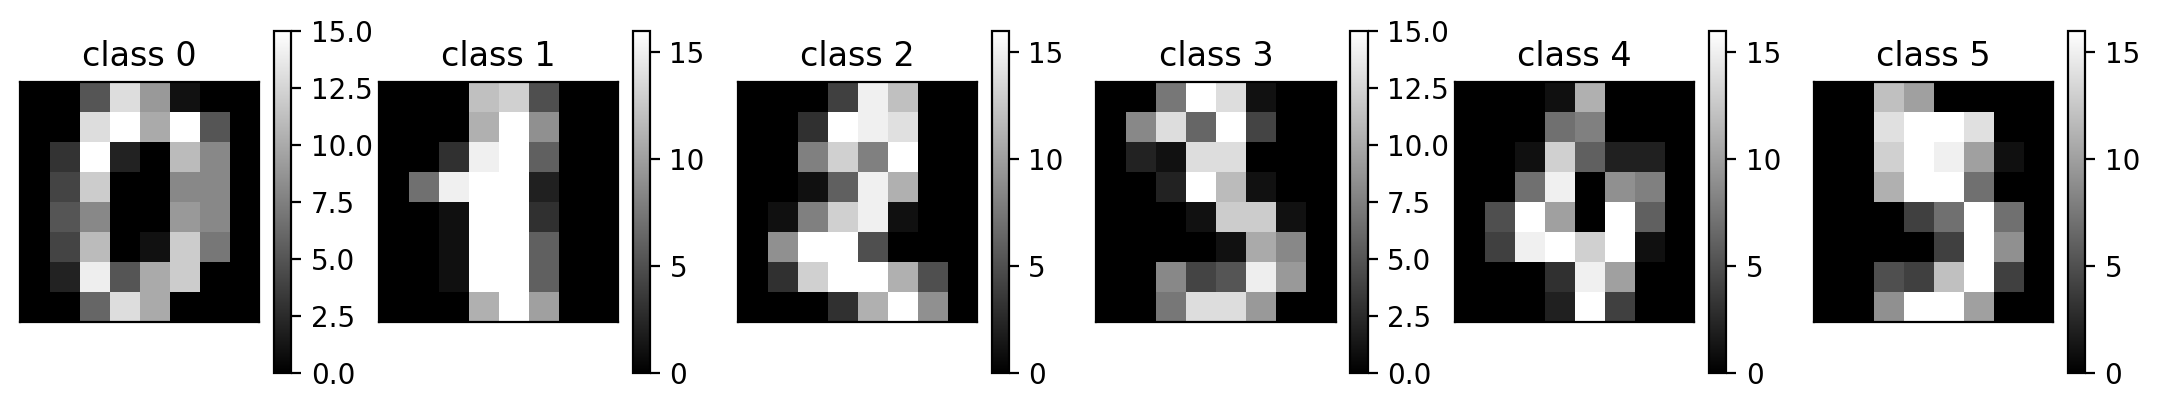

In [3]:
def plot_digit(images, titles, h, w, n_row=4, n_col=10):
    """Helper function to plot digits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(images.shape[0]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.colorbar()
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# As example, we plot a number of each class (or person)
titles = ['class '+str(c) for c in range(6)]
ind_digit = [np.where(y == c)[0][0] for c in range(6)]

plot_digit(X[ind_digit,:], titles, h=8, w=8)

Aquí cada dígito viene representado con una imagen de $8x8$ píxeles que se representa con un vector disperso que no hace más que asignar un valor de intensidad (entre $0$ y $16$) a cada uno de los píxeles de la imagen.  La base de datos original de MNIST se compone de imágenes de $32x32$ con valores de intensidad a $1$ ó $0$, esta base de datos se ha generado tomando los cuadrados $4x4$ y sumando las intensidades de cada cuadrado, por eso estos píxeles tiene valores de intensidad entre $0$ y $16$.

In [4]:
X[0,:]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Como hemos indicado, podemos obtener una representación alternativa (*embedding*) de estas imágenes aplicando un PCA...

### Ejercicio
Complete la siguiente celda para obtener un *embedding* de dimensión 64 mediante un PCA  para el problema anterior (más adelante reduciremos la dimensión de este *embedding*).

Una vez obtenido el *embedding*, guardelo en la variable `X_pca` para que la siguiente celda de código le permita analizar diferentes aspectos de esta transformación, así como visualizar las dos primeras componentes de este *embedding*.

In [5]:
from sklearn.decomposition import PCA

N_feat_max=64
#<SOL>
my_pca = PCA(n_components=N_feat_max).fit(X)
X_pca = my_pca.transform(X)
#</SOL>

### Análisis del tamaño embedding con PCA
Vamos a analizar los autovalores del PCA así como la varianza acumulada en los datos transformados en función del tamaño del *embedding*.

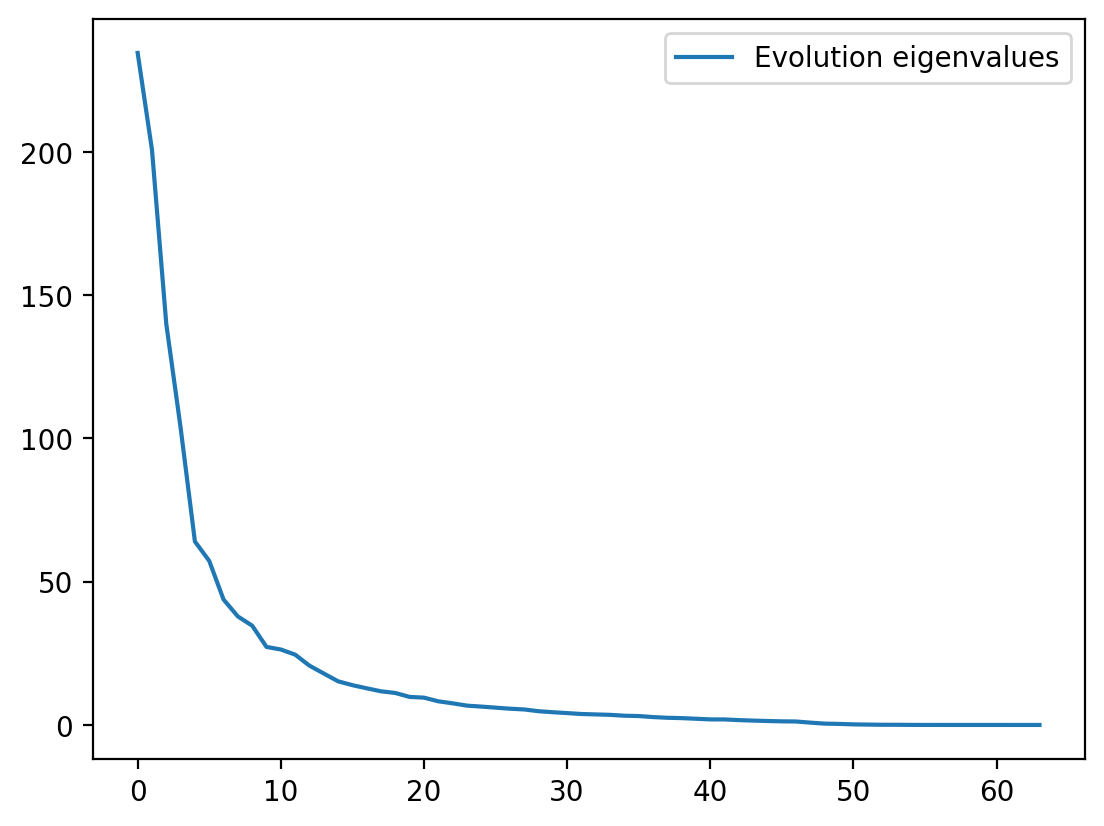

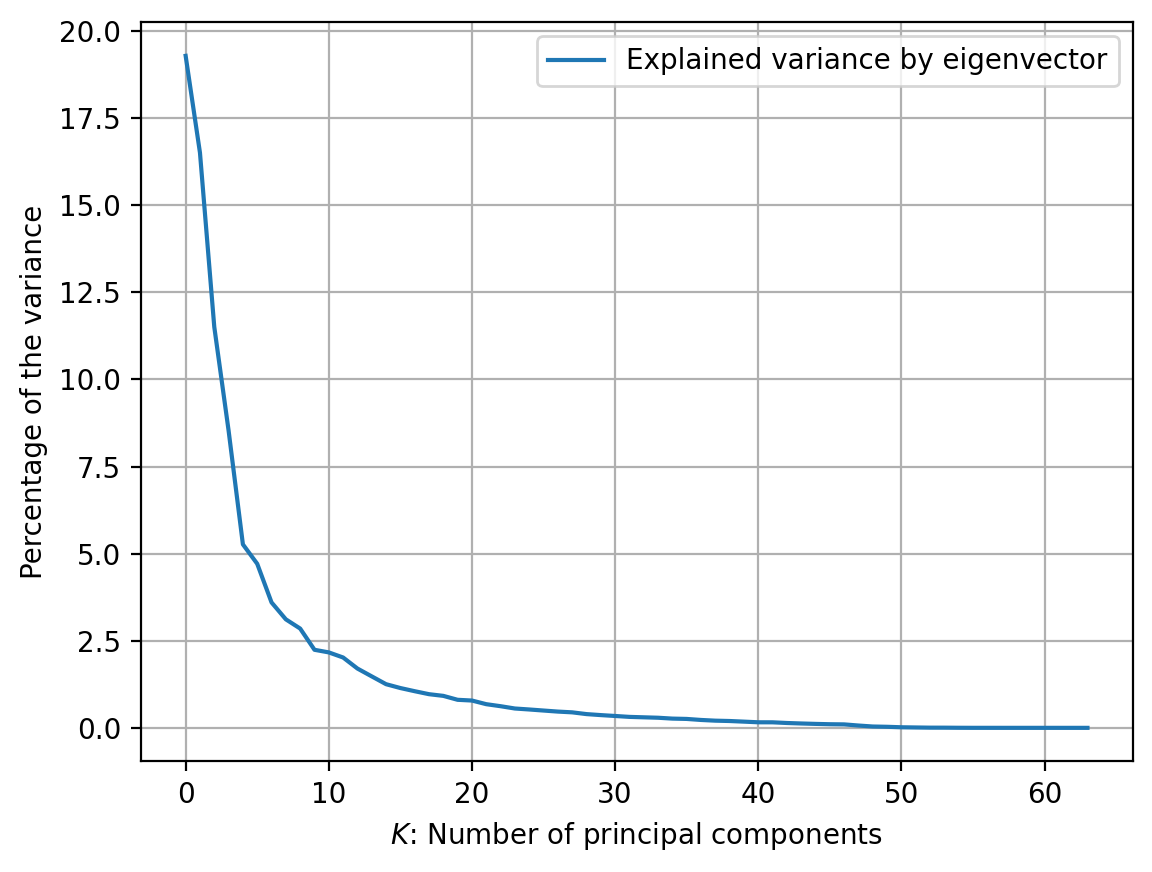

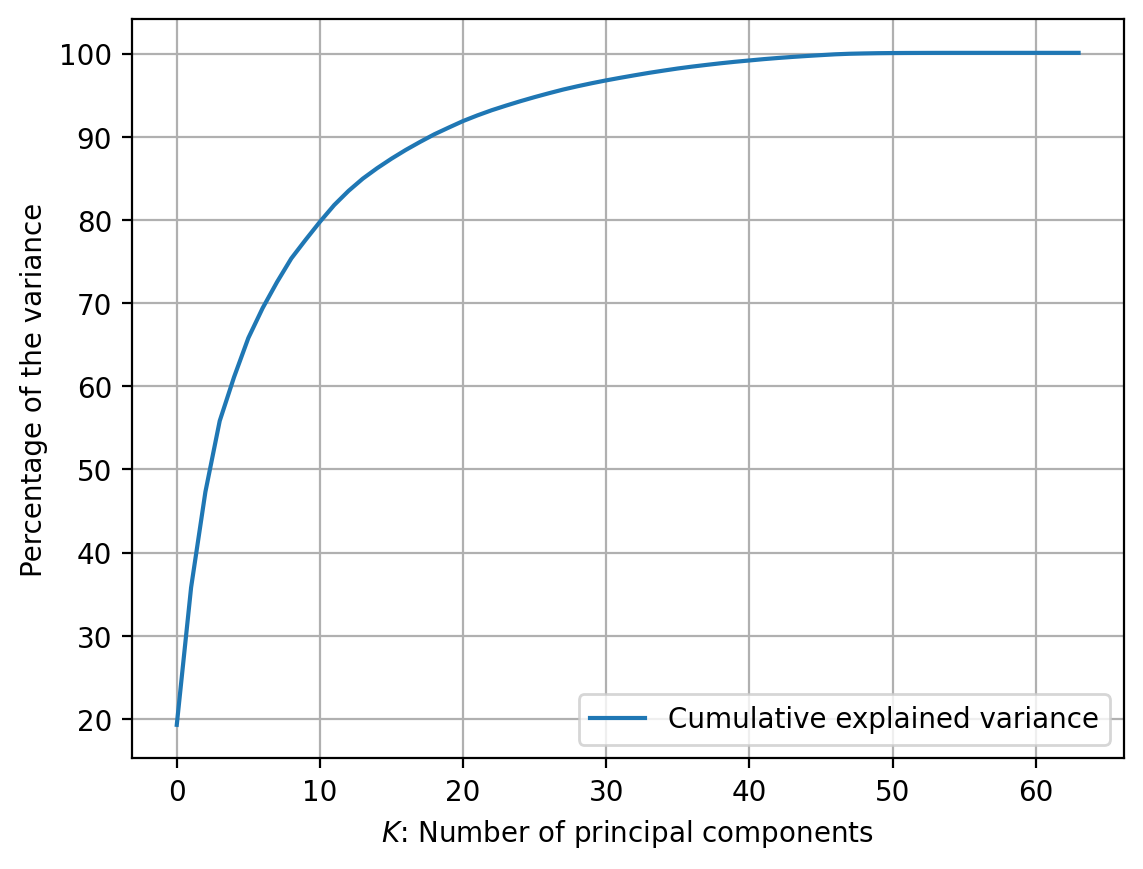

In [6]:
# 1. Analyze eigenvalues
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.legend()
plt.show()

# 2.- Compute an estimation of the variance in data using the training set

data_variance = np.sum(np.var(X,0))

# 3.- plot the explain variance of each eigenvector and cummulative sum of the
# sorted eigenvalues divided by the total variance of the data
# 3.1.- express the y-axis in percentage

plt.figure()
plt.plot(100*eigenvalues/data_variance, label='Explained variance by eigenvector')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')
plt.legend()
plt.show()

plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Cumulative explained variance')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')
plt.legend()
plt.show()

A la vista de esta figura, ¿cuántos componentes principales crees que son suficientes para obtener un buen embedding de los datos y no perder información relevante?

### Visualización del embedding

Además, el embedding también nos sirve para visualizar la distribución de los datos. En este caso, como las primeras componentes del PCA tienen la mayor parte de la información (varianza) podemos usar las dos primeras componentes del PCA para ver lo que ocurre en el espacio del *embedding*.

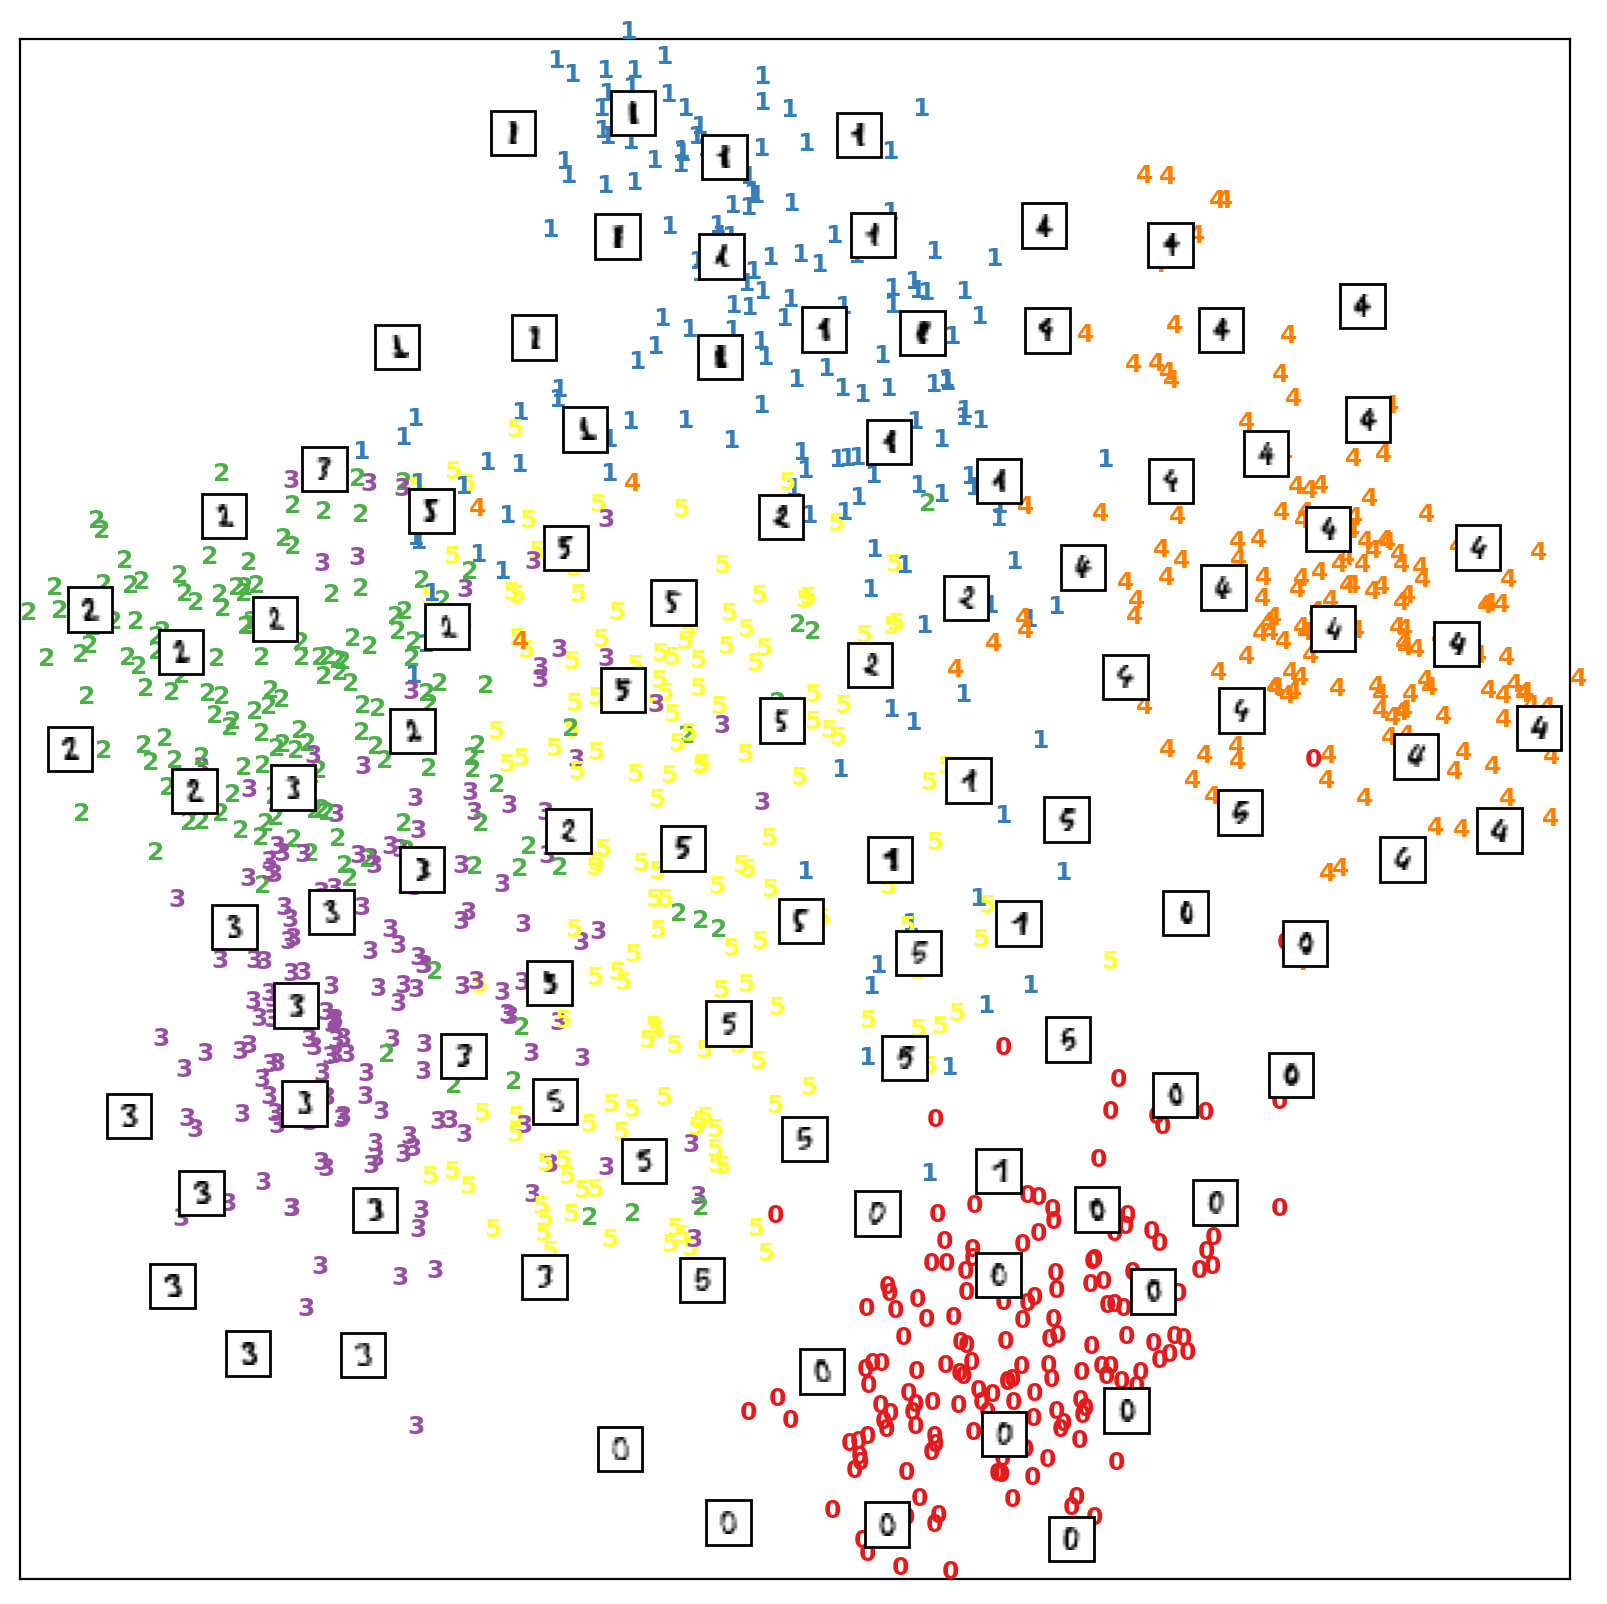

In [7]:
from matplotlib import offsetbox

# Scale and visualize the embedding vectors
def plot_embedding(X,y, digits):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1((y[i]+1 )/ 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    # Add some example images
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])


# Plot two first PCA dimensions
plt.figure(figsize=(10,10))
plot_embedding(X_pca[:,:2],y, digits)

### Diseño del *embedding* para la clasificación de dígitos
Podemos diseñar un pipeline (incluyendo una posterior etapa de clasificación con un K-NN) para seleccionar el tamaño adecuado de nuestro *embedding*.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.6)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Define pipeline steps
pipe = Pipeline([('PCA', PCA()),
                 ('kNN', neighbors.KNeighborsClassifier( ))])

# Define parameters to CV
param_grid = {
    'PCA__n_components': np.arange(1,20),
    'kNN__n_neighbors': np.arange(1,5),
    'kNN__weights':['uniform','distance'],
}

# CV with GridSearchCV
grid_pipe = GridSearchCV(pipe, param_grid, cv=5)
grid_pipe.fit(X_train, Y_train)

# Test
accuracy_train_knn = grid_pipe.score(X_train,Y_train)
accuracy_test_knn = grid_pipe.score(X_test,Y_test)

print("El número de componentes de PCA es {0:d}".format(grid_pipe.best_estimator_['PCA'].n_components))
print("El número de vecinos seleccionado es k={0:d}".format(grid_pipe.best_estimator_['kNN'].n_neighbors))
print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de componentes de PCA es 15
El número de vecinos seleccionado es k=3
Accuracy train 100.00%. Accuracy test 98.46%



Si lo comparamos con las prestaciones que darían los datos originales....

In [9]:
# Define parameters to CV
param_grid = {
    'n_neighbors': np.arange(1,10),
    'weights':['uniform','distance'],
}

# CV with GridSearchCV
grid_knn = GridSearchCV(neighbors.KNeighborsClassifier( ), param_grid, cv=5)
grid_knn.fit(X_train, Y_train)

# Test
accuracy_train_knn = grid_knn.score(X_train,Y_train)
accuracy_test_knn = grid_knn.score(X_test,Y_test)

print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

Accuracy train 100.00%. Accuracy test 98.92%



# K-means y GMM para la obtención de *embeddings*

Los algoritmos de agrupamiento o *clustering* también nos sirven para hacer una reducción de dimensionalidad. Para entender cómo funcionan y cómo podemos extraer una representación de baja dimensión de nuestros datos a partir de ellos, empecemos considernado el algoritmo K-means, haciendo una pequeña revisión del mismo (aunque ya lo hemos visto en el curso de *Fundamentals of ML*) y viendo cómo nos pueden ayudar para reducir la dimensión de nuestros datos.

## Review: K-means


El algoritmo k-means es un algoritmo particularmente sencillo que nos permite encontrar grupos (clusters) sobre un conjunto de datos de forma **no supervisada**. Estos grupos pueden ser útiles para entender la estructura de nuestros datos y, por tanto, nos pueden ayudar a obtener una representación alternativa de los mismos.



Dado un dataset, una **distancia** entre cualquier par de puntos y un número $K$ prefijado de grupos, K-means implementa el siguiente algoritmo iterativo para asignar cada dato a una de los $K$ posibles grupos:

* **Inicialización**. Cada grupo se caracteriza por un *centroide* que se inicializa, por ejemplo, escogiendo aleatoriamente un punto de nuestro dataset.

* **Iterativavemente**, hasta la convergencia se repiten los siguientes pasos:

  - **Paso I: asignación**. Cada dato del dataset se asigna al grupo cuyo centroide esté más cerca de acuerdo a la métrica de distancia.
  - **Paso II: actualizar centroides**. Dadas las asignaciones de los datos a los grupos, se recalculan los centroides como la media aritmética de los puntos asignados a cada grupo.

  Si no hay cambios en la asignación de puntos a grupos entre dos iteraciones consecutivas, el algoritmo ha convergido. En caso contrario seguimos iterando.


<img src='http://www.tsc.uc3m.es/~olmos/BBVA/k-mean_good.jpg' width=1000 />

**Aspectos a tener en cuenta:**

* Es un algoritmo muy sensible a la inicialización. En la práctica, el algoritmo k-means es muy rápido (uno de los algoritmos de agrupamiento más rápidos disponibles), pero su solución no es única (hay muchos mínimos locales). Por eso puede ser útil reiniciarlo varias veces y quedarnos la solución que obtiene los grupos más compactos.
* El número de grupos $K$ es un parámetro del modelo que debemos ajustar. Aunque normalmente no podemos utilizar esquemas de CV al estar en un escenario no supervisado, para el diseño de *embeddings* en los que hay una etapa posterior de clasificación, podemos usar el error del clasificador para elegir este parámetro.


## Obtención de embeddings con K-means

Para ver cómo podemos obtener una representación de baja dimensión o *embedding* a partir de un algoritmo de agrupamiento, consideraremos un ejemplo similar al de la figura anterior para poder visualizar el resultado fácilmente ...

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


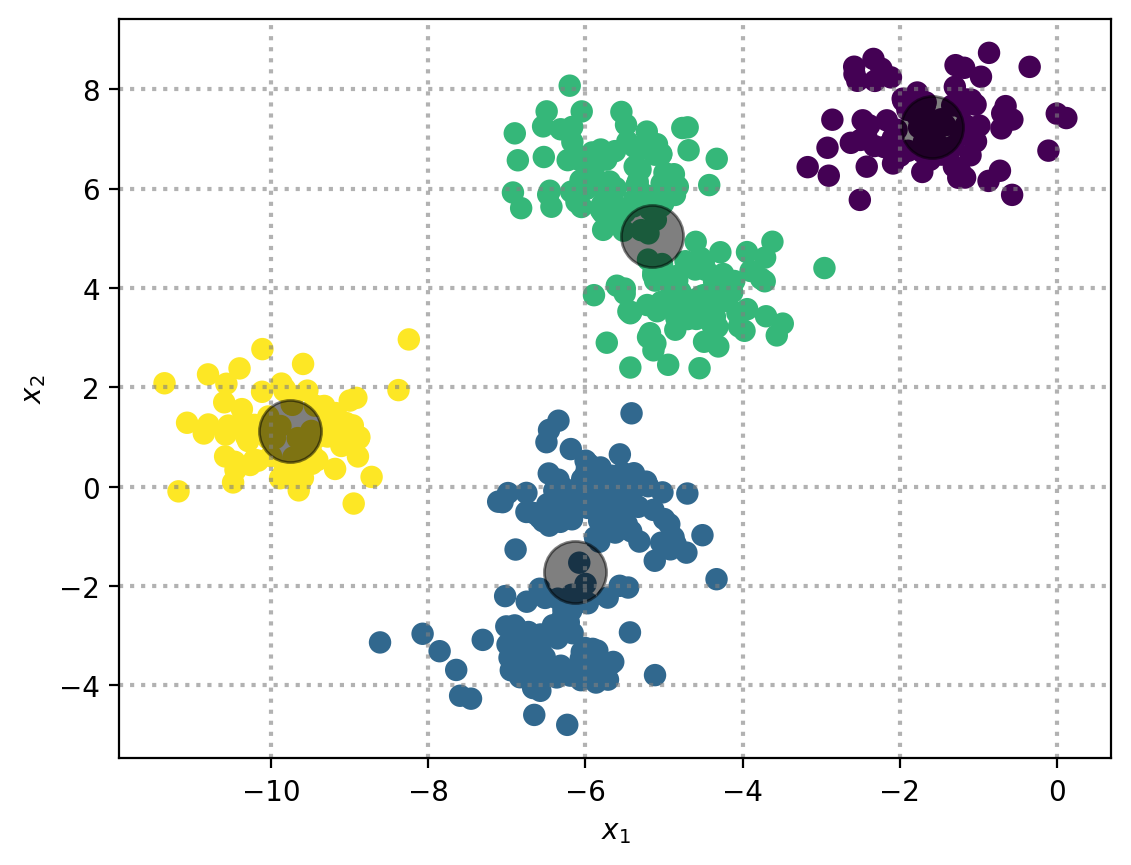

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

rng = np.random.RandomState(36)

X_blob, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=0.6, random_state=22)


# K-means con K=4
K=4

kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
kmeans.fit(X_blob) # Entrenamos k-means
y_kmeans = kmeans.predict(X_blob) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

# Plot k-means result
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

plt.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Una vez tenemos definidos grupos y centroides asociados a estos grupos, una opción para representar nuestros datos sería considerar la pertenencia de cada dato a un grupo como representación. De este modo, los datos del primer grupo podrían codificarse como [1,0,0,0], los datos del segundo grupo como [0,1,0,0] y así sucesivamente. Pero esto nos llevaría a una representación dispersa de los datos que, como sabemos, no es lo más deseable.

Para evitar esto, podemos representar cada dato con la distancia a los diferentes centroides. De este modo, para este ejemplo, tendríamos:


In [11]:
from sklearn.metrics import pairwise_distances
# Embeddings are distances to centers
X_embed = pairwise_distances(X_blob, centers)

Esto es equivalente a:

In [12]:
X_embed = kmeans.transform(X_blob)

Con esto hemos cambiado la representación de nuestros datos y ahora tienen tantas componentes como centroides (en este caso particular hemos pasado de un problema de 2 dimensiones a un problema de 4), pero esta nueva representación es más discriminativa entre grupos de datos, es decir, captura la estructura del agrupamiento entre los datos...

In [13]:
# Embedding of group 0
print('Algunos ejemplos del embedding para el grupo 0')
ind = np.where(y_kmeans == 0)[0][:10]
print(X_embed[ind,:])
# Embedding of group 1
print('Algunos ejemplos del embedding para el grupo 1')
ind = np.where(y_kmeans == 1)[0][:10]
print(X_embed[ind,:])
# Embedding of group 2
print('Algunos ejemplos del embedding para el grupo 2')
ind = np.where(y_kmeans == 2)[0][:10]
print(X_embed[ind,:])
# Embedding of group 3
print('Algunos ejemplos del embedding para el grupo 3')
ind = np.where(y_kmeans == 3)[0][:10]
print(X_embed[ind,:])

Algunos ejemplos del embedding para el grupo 0
[[ 1.18376152 11.23254258  5.27259379 11.31822074]
 [ 1.07911691  9.32885176  3.14937037  9.19411961]
 [ 0.85347915  9.48303586  4.08698923  9.98353309]
 [ 1.1185508  10.74180921  4.40982624 10.44432274]
 [ 1.56247014 10.40821595  5.32783043 11.17853627]
 [ 1.7223311  11.07664931  5.78142042 11.71479588]
 [ 0.41630418 10.37885196  4.34072965 10.38552889]
 [ 1.73488833  8.32588309  2.74150921  8.61379937]
 [ 0.49173385 10.4074642   4.32830414 10.37554147]
 [ 0.96821228  9.44254207  4.12908818  9.99985164]]
Algunos ejemplos del embedding para el grupo 1
[[ 8.10761698  2.11734378  4.71945586  3.92220582]
 [ 8.25163239  1.99204761  4.84995506  3.86612241]
 [12.92112537  2.86815988  9.59149041  5.86875266]
 [ 8.0171176   2.03596054  4.94269274  4.65081285]
 [ 8.37297393  1.87566169  4.97017236  3.84740756]
 [10.6860825   0.64040673  7.40836891  4.68025718]
 [ 9.42241161  1.045488    6.53415239  5.33294313]
 [ 8.5142015   2.01212291  4.95556908 

Veamos ahora cómo aplicar esta transformación al problema de clasificación de dígitos anterior, donde de verdad veremos cómo esta aproximación nos da una reducción de dimensionalidad...

### Ejercicio
Complete la siguiente celda de código para obtener un *embedding* de dimensión 2 mediante un K-means para el problema de clasificación de dígitos. De momento, trabaje con todo el conjunto original almacenado en la variable `X`.

Una vez obtenido el *embedding*, guardelo en la variable `X_kmeans` para que la siguiente celda de código le permita visualizarlo.

In [14]:
K=2
#<SOL>
kmeans = KMeans(n_clusters=K, n_init=20) # Definimos objeto con parámetros por defecto
kmeans.fit(X) # Entrenamos k-means
X_kmeans = kmeans.transform(X) # Entrenamos k-means
#</SOL>

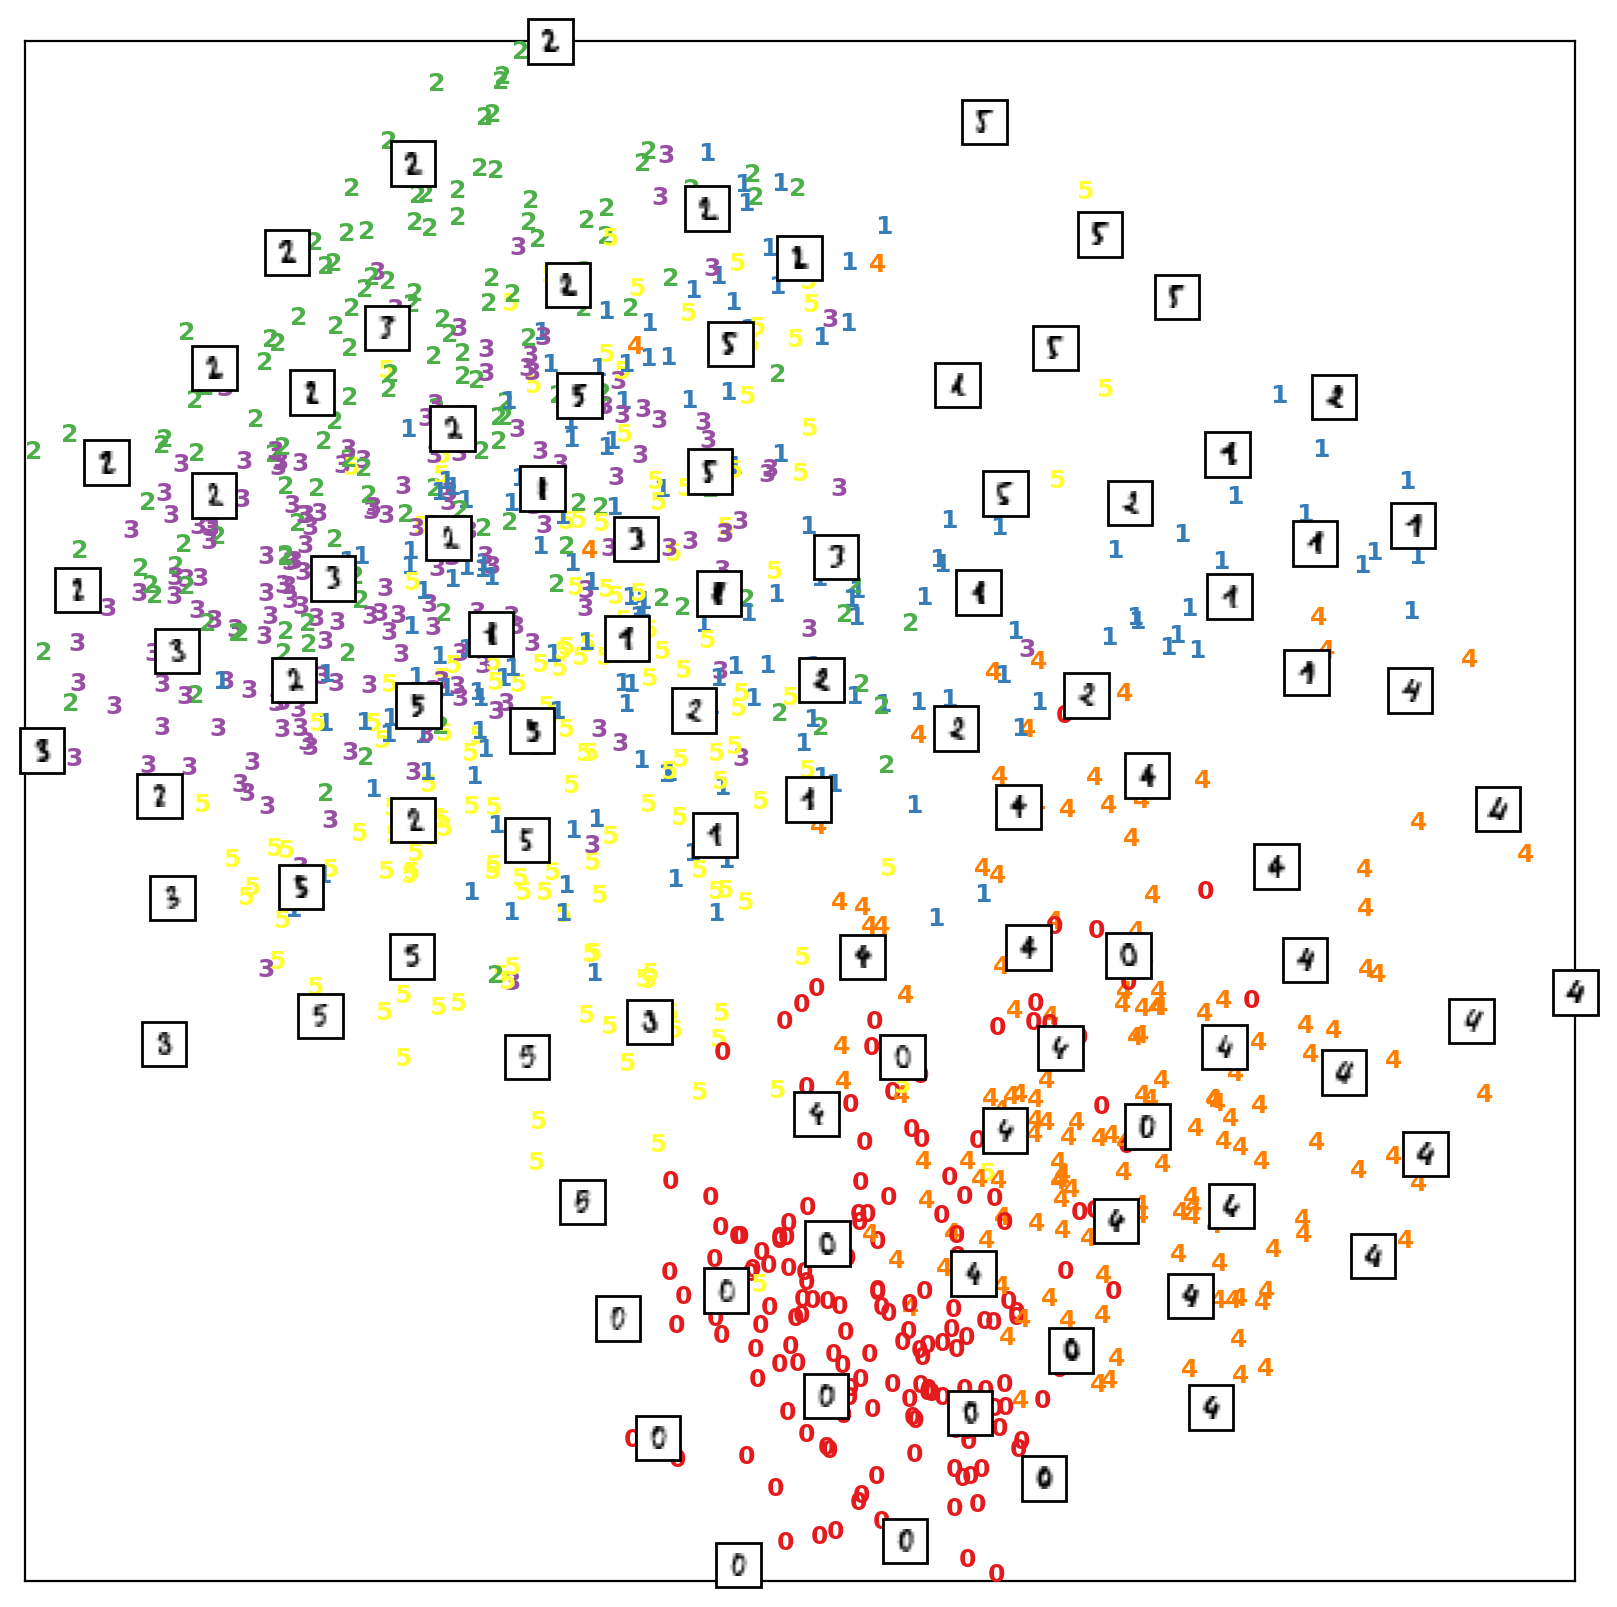

In [15]:
# Plot Kmeans embedding
plt.figure(figsize=(10,10))
plot_embedding(X_kmeans, y, digits)

Este tipo de representación suele llevar a espacios con más dimensiones que el PCA, pero funcionan muy bien cuando nuestros datos están realmente distribuidos en grupos definidos de datos ya que son capaces de capturar muy bien esta estructura.



### Análisis del tamaño del embedding con K-means

Veamos con el siguiente ejemplo cual sería la dimensión adecuada de nuestro *embedding* para obtener buenas prestaciones en una posterior clasificación con un K-NN. Nótese que, al igual que en el PCA, aquí podríamos usar un pipeline, pero para tener más información vamos a ir barriendo el tamaño del *embedding* (número de centroides) y analizar las prestaciones en test sobre este parámetro...

In [16]:
# Define parameters to CV
param_grid = {
    'n_neighbors': np.arange(1,10),
    'weights':['uniform','distance'],
}

for K in range(2,21,2):
  # train K-means for embedding computation
  kmeans = KMeans(n_clusters=K,  n_init=10) # Definimos objeto con parámetros por defecto
  kmeans.fit(X_train) # Entrenamos k-means
  # Get centers
  centers = kmeans.cluster_centers_

  # Embeddings are distances to centers
  X_kmeans_train =  kmeans.transform(X_train)
  X_kmeans_test =  kmeans.transform(X_test)

  # CV with GridSearchCV
  grid_knn = GridSearchCV(neighbors.KNeighborsClassifier( ), param_grid, cv=5)
  grid_knn.fit(X_kmeans_train, Y_train)

  acc_val = grid_knn.best_score_

  # Test
  accuracy_train_knn = grid_knn.score(X_kmeans_train,Y_train)
  accuracy_test_knn = grid_knn.score(X_kmeans_test,Y_test)

  print("El número de componentes del embedding es {0:d}".format(K))
  print("Accuracy en validación es {0:.2f}".format(acc_val*100))
  print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))


El número de componentes del embedding es 2
Accuracy en validación es 52.41
Accuracy train 100.00%. Accuracy test 57.08%

El número de componentes del embedding es 4
Accuracy en validación es 84.97
Accuracy train 100.00%. Accuracy test 84.62%

El número de componentes del embedding es 6
Accuracy en validación es 91.67
Accuracy train 100.00%. Accuracy test 93.38%

El número de componentes del embedding es 8
Accuracy en validación es 92.13
Accuracy train 100.00%. Accuracy test 94.00%

El número de componentes del embedding es 10
Accuracy en validación es 92.13
Accuracy train 94.92%. Accuracy test 93.85%

El número de componentes del embedding es 12
Accuracy en validación es 94.45
Accuracy train 100.00%. Accuracy test 96.31%

El número de componentes del embedding es 14
Accuracy en validación es 94.22
Accuracy train 100.00%. Accuracy test 95.38%

El número de componentes del embedding es 16
Accuracy en validación es 95.38
Accuracy train 100.00%. Accuracy test 96.31%

El número de componen

## Review: Gaussian Mixture Model

Un GMM permite modelar la distribución de nuestros datos como una mezcla de distribuciones gaussianas parametrizada del siguiente modo:

\begin{align}
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\Sigma}_k)
\end{align}

donde $(\pi_1,\ldots,\pi_K)$, $(\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_K)$, $(\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)$ son los **parámetros del modelo**, en concreto:

- $\pi_k$ es la probabilidad de que el dato provenga de la componente $k$-ésima de la mezcla.

- $\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k,\mathbf{\Sigma}_k)$ modela a cada una de las gaussianas que forman la mezcla. La gaussiana $k$-ésima tiene media $\boldsymbol{\mu}_k$ y matriz de covarianzas $\mathbf{\Sigma}_k$.


Los parámetros del modelo se escogen para maximizar la **probabilidad de los datos ya observados o evidencia**:

$$ \max_{(\pi_1,\ldots,\pi_K),(\boldsymbol{\mu}_1,\ldots,\boldsymbol{\mu}_K), (\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)}  ~~\sum_{n=1}^{N} \log  p(\mathbf{x}_n) $$

Este problema se resuelve de forma numérica mediante un algoritmo iterativo conocido como **EM** (Expectation-Maximization). Para implementarlo podemos usar la clase [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) de sklearn.






Usando GMMs, podemos solventar dos **limitaciones importantes** de K-means:

- K-means asume de forma implícita que los **grupos son esféricos** (todos los puntos que están a la misma del centroide). El GMM nos deja modelar diferentes matrices de covarianza $\mathbf{\Sigma}_k$ para cada centroide y con ello los grupos pueden tener formas más diversas (elíptica, etc).

- Mientras que el K-means hace una asignación **dura** de cada punto a un grupo, el GMM proporciona una medida de incertidumbre para identificar puntos que están cerca de varios grupos. De hecho, dado un dato $\bf x$, podemos calcular la **probabilidad a posteriori** de que cada grupo haya generado dicho dato:
$$P(\text{cluster}=k|\mathbf{x})= \frac{\pi_{k} \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_{k},\mathbf{\Sigma}_{k})}{\sum_{q=1}^K \pi_{q} \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_{q},\mathbf{\Sigma}_{q})}$$
Esto significa que tenemos una **probabilidad de pertenecer a cada grupo**, en lugar de una asignación dura que es lo que proporcionaba K-means.
En sklearn, podemos calcular dichas probabilidades usando el método `predict_proba`.

Por último, al igual en el K-means, necesitamos seleccionar el número de grupos. Del mismo modo que en K-means, esto no es sencillo en tareas no supervisadas, pero para el diseño de *embeddings* en datasets etiquetados, podemos usar un clasificador para evaluar el mejor tamaño del *embedding*.


## Obtención de *embeddings* con GMM
Si en el K-means usábamos la distancia de los datos a los centroides para obtener un *embedding*, en el GMM directamente podemos utilizar la probabilidad de pertenecia a cada grupo para obtener esta representación.
Veamos cómo sería este *embedding* con el ejemplo de juguete, para ello empecemos representando los datos y la distribución de probabilidad que modela el GMM...

<ipython-input-17-c1c0f9c6fcf7>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_blob[:, 0], X_blob[:, 1], s=40, cmap='viridis')


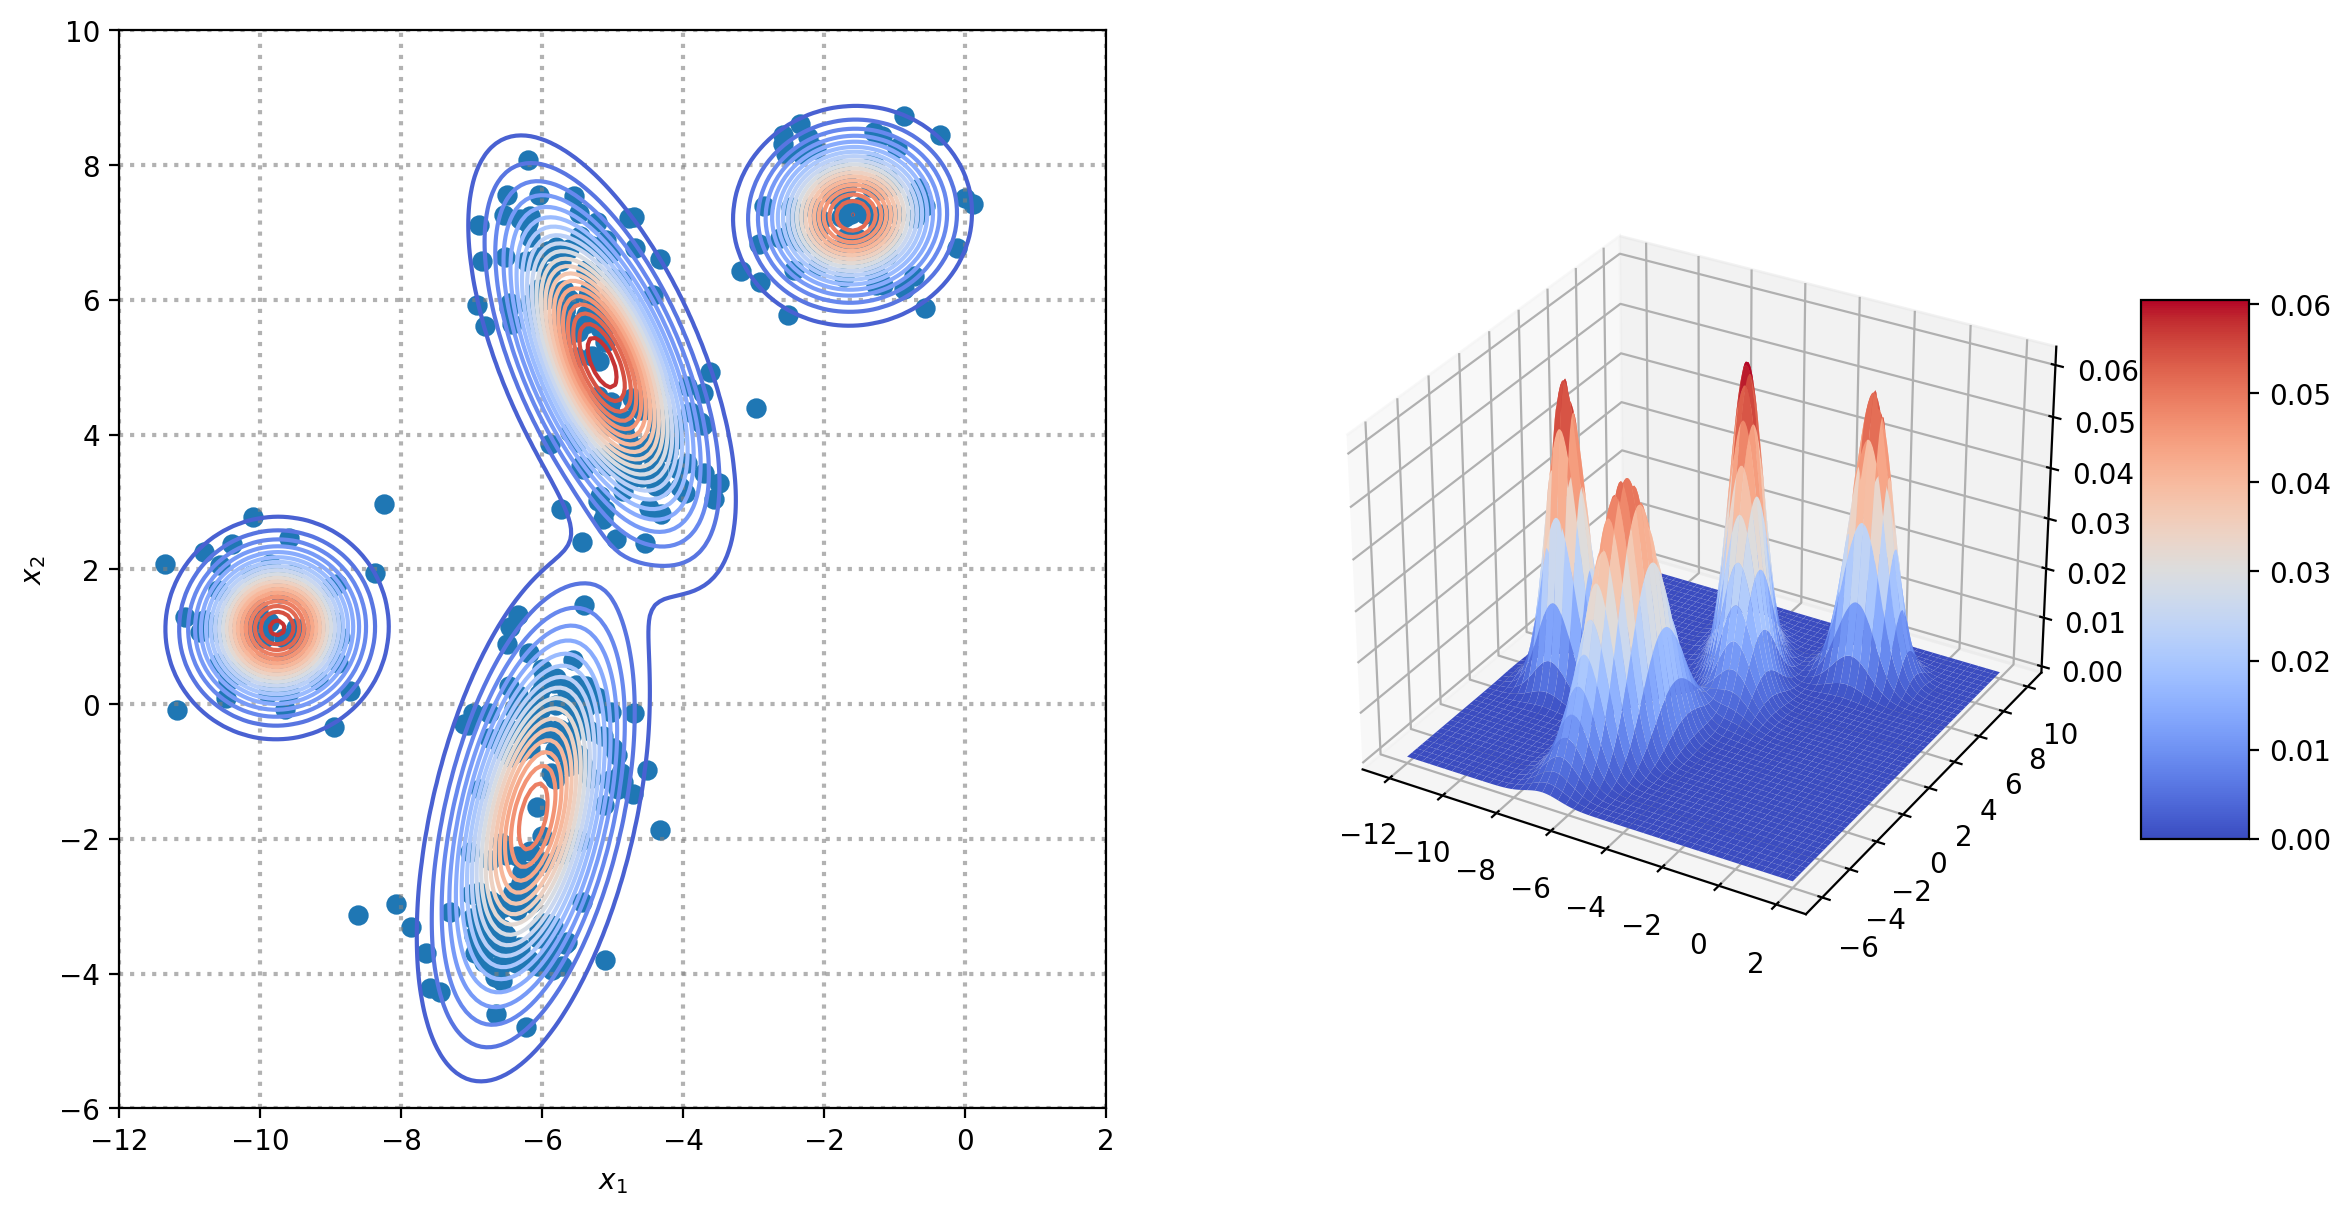

In [17]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn #Multivariate normal distribution
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# GMM con K=4
K=4
gmm = GaussianMixture(n_components=K,covariance_type='full',n_init=10)
gmm.fit(X_blob)
y_gmm = gmm.predict(X_blob)


# Lets plot the pdf contour plot
intervals = 200

# Creamos una rejilla
x_mesh = np.linspace(-12, 2, intervals)
y_mesh = np.linspace(-6, 10, intervals)

X_mesh,Y_mesh = np.meshgrid(x_mesh,y_mesh)

xys = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T


Zgmm = np.zeros(len(xys))
for k in range(K):
    Zgmm += gmm.weights_[k]*mvn(gmm.means_[k,:], gmm.covariances_[k]).pdf(xys)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1)

Zgmm = Zgmm.reshape([intervals,intervals])
ax.contour(X_mesh, Y_mesh, Zgmm, 20, cmap=cm.coolwarm)
ax.scatter(X_blob[:, 0], X_blob[:, 1], s=40, cmap='viridis')
ax.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X_mesh, Y_mesh, Zgmm, cmap=cm.coolwarm)
ax.grid(which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Si ahora calculamos la probabilidad de pertenecia de los datos a los diferentes centroides o gaussianas, podemos obtener el *embedding* de los datos.

In [18]:
X_blobs_gmm = gmm.predict_proba(X_blob)

# Embedding of group 0
print('Algunos ejemplos del embedding para el grupo 0')
ind = np.where(y_gmm == 0)[0][:10]
print(X_blobs_gmm[ind,:])
# Embedding of group 1
print('Algunos ejemplos del embedding para el grupo 1')
ind = np.where(y_gmm == 1)[0][:10]
print(X_blobs_gmm[ind,:])
# Embedding of group 2
print('Algunos ejemplos del embedding para el grupo 2')
ind = np.where(y_gmm == 2)[0][:10]
print(X_blobs_gmm[ind,:])
# Embedding of group 3
print('Algunos ejemplos del embedding para el grupo 3')
ind = np.where(y_gmm == 3)[0][:10]
print(X_blobs_gmm[ind,:])

Algunos ejemplos del embedding para el grupo 0
[[9.99999967e-01 4.31398449e-18 3.76599519e-12 3.34592130e-08]
 [9.87787590e-01 4.51665041e-16 1.25940897e-11 1.22124104e-02]
 [9.95129884e-01 3.74732558e-18 3.40122015e-10 4.87011575e-03]
 [9.94320520e-01 3.04800048e-19 1.90656356e-10 5.67948015e-03]
 [9.93628107e-01 4.70600290e-18 1.42860493e-10 6.37189335e-03]
 [9.93853929e-01 7.01770155e-29 6.09746598e-03 4.86048384e-05]
 [9.99996755e-01 1.93649934e-13 1.11099185e-12 3.24511695e-06]
 [9.99980982e-01 6.74120874e-25 7.25819404e-06 1.17602202e-05]
 [9.85478425e-01 2.41881333e-15 6.28773155e-12 1.45215749e-02]
 [9.95950203e-01 3.07932030e-13 5.07179238e-12 4.04979742e-03]]
Algunos ejemplos del embedding para el grupo 1
[[4.37378051e-19 9.99999988e-01 4.42822972e-43 1.19214105e-08]
 [2.77274130e-24 9.99999999e-01 2.93168058e-50 9.91961385e-10]
 [5.03272247e-19 1.00000000e+00 2.42631341e-40 2.33960641e-14]
 [4.89216575e-28 1.00000000e+00 4.18183077e-52 2.83419060e-15]
 [8.22007009e-25 9.9999

Como vemos en este caso, al tener datos claramente asignados a un grupo, su probabilidad de pertencia a cada grupo tiende a ser uno o cero, dando *embeddings* practicamente binarios (no hay datos entre dos grupos). Esto suele ocasionar que el número de grupos o el tamaño del *embedding* tienda a ser mayor que en las aproximaciones anteriores.

Veamos cómo se comporta este *embedding* en el problema de clasificación de dígitos...   

### Ejercicio
Complete la siguiente celda de código para obtener un *embedding* de dimensión 2 usando un modelo GMM para el problema de clasificación de dígitos. De momento, trabaje con todo el conjunto original almacenado en la variable `X`.

Una vez obtenido el *embedding*, guárdelo en la variable `X_gmm` para que la siguiente celda de código le permita visualizarlo.

In [19]:
k=2 # For representative purposes
#<SOL>
gmm = GaussianMixture(n_components=k,covariance_type='full',n_init=10)
gmm.fit(X)
X_gmm = gmm.predict_proba(X)
#</SOL>


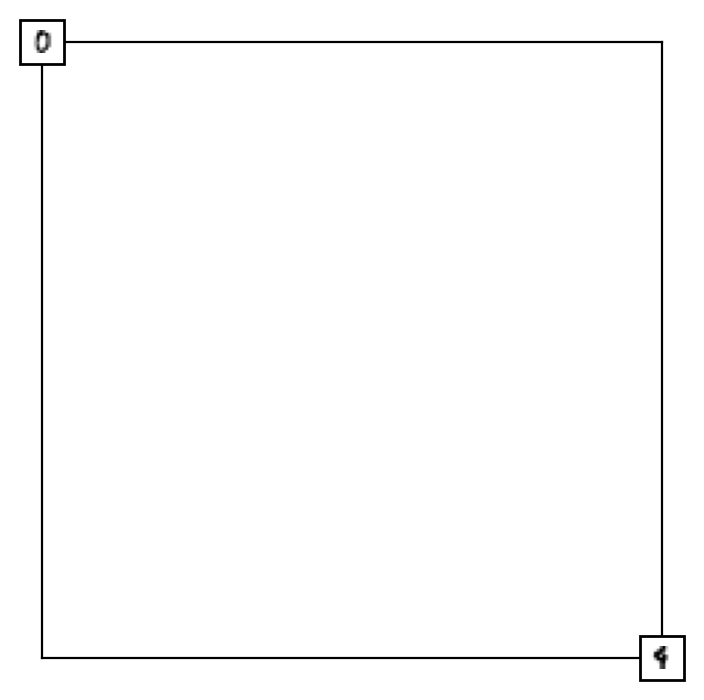

In [20]:
# Plot GMM embedding
plt.figure(figsize=(4,4))
plot_embedding(X_gmm, y, digits)

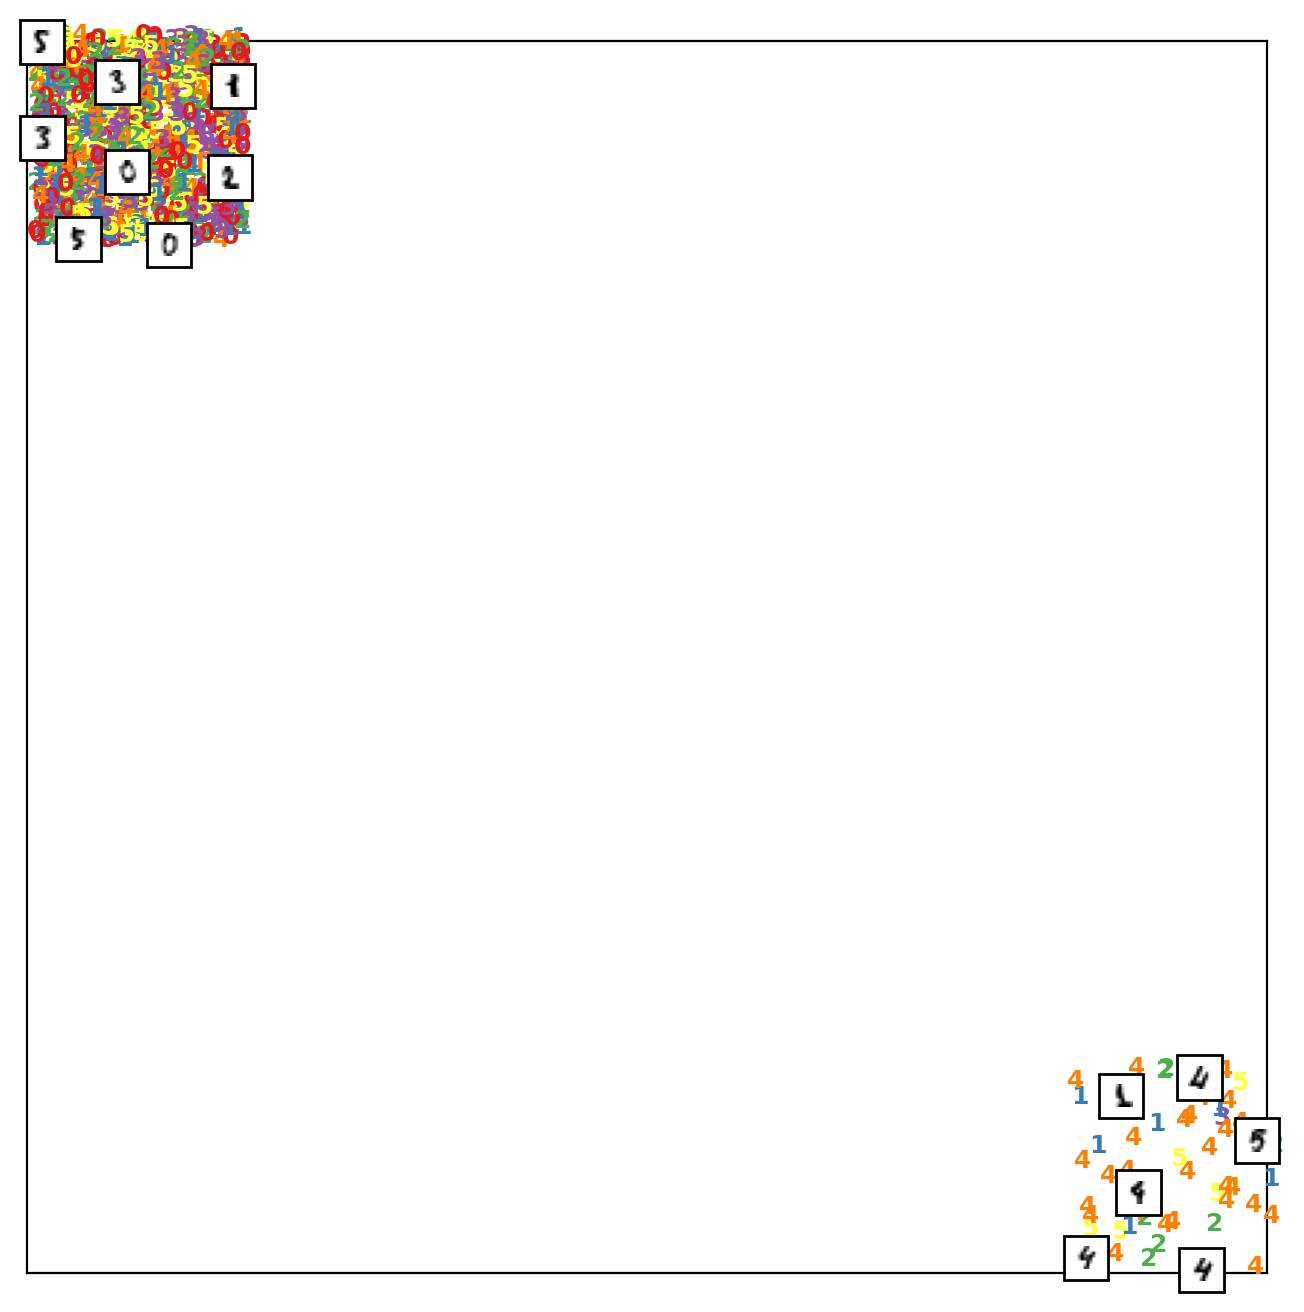

In [21]:
# Plot GMM embedding
plt.figure(figsize=(8,8))
# Let's represent again with some noise to uncolapse the data
plot_embedding(X_gmm + 0.2*np.random.rand(X_gmm.shape[0],X_gmm.shape[1]), y, digits)

Como vemos y tal y como esperábamos, el embedding del GMM con solo dos dimensiones acaba proyectando muchos valores en un único punto. Esto hace que estas variables no vayan a ser de utilidad para clasificar, está claro que necesitamos aumentar la dimensión del embedding...

### Análisis del tamaño del embedding con GMM

Al igual que con el K-means podemos analizar la influencia del tamaño del embedding en un posterior proceso de clasificación (con un K-NN).

In [22]:
# Define parameters to CV
param_grid = {
    'n_neighbors': np.arange(1,10),
    'weights':['uniform','distance'],
}

for K in range(5,51,5):
  # train GMM for embedding computation
  gmm = GaussianMixture(n_components=K,covariance_type='full',n_init=10)
  gmm.fit(X_train)

  # Embeddings are probabilities of belonging to each center
  X_gmm_train = gmm.predict_proba(X_train)
  X_gmm_test = gmm.predict_proba(X_test)

  # CV with GridSearchCV
  grid_knn = GridSearchCV(neighbors.KNeighborsClassifier( ), param_grid, cv=5)
  grid_knn.fit(X_gmm_train, Y_train)
  acc_val = grid_knn.best_score_

  # Test
  accuracy_train_knn = grid_knn.score(X_gmm_train, Y_train)
  accuracy_test_knn = grid_knn.score(X_gmm_test, Y_test)

  print("El número de componentes del embedding es {0:d}".format(K))
  print("Accuracy en validación es {0:.2f}".format(acc_val*100))
  print("Accuracy train {0:.2f}%. Accuracy test {1:.2f}%\n".format(accuracy_train_knn*100, accuracy_test_knn*100))

El número de componentes del embedding es 5
Accuracy en validación es 82.90
Accuracy train 92.38%. Accuracy test 86.15%

El número de componentes del embedding es 10
Accuracy en validación es 92.14
Accuracy train 90.76%. Accuracy test 45.85%

El número de componentes del embedding es 15
Accuracy en validación es 90.29
Accuracy train 90.76%. Accuracy test 34.00%

El número de componentes del embedding es 20
Accuracy en validación es 92.38
Accuracy train 92.84%. Accuracy test 32.77%

El número de componentes del embedding es 25
Accuracy en validación es 90.99
Accuracy train 92.38%. Accuracy test 78.77%

El número de componentes del embedding es 30
Accuracy en validación es 95.38
Accuracy train 96.07%. Accuracy test 93.69%

El número de componentes del embedding es 35
Accuracy en validación es 94.92
Accuracy train 96.07%. Accuracy test 95.85%

El número de componentes del embedding es 40
Accuracy en validación es 93.76
Accuracy train 95.61%. Accuracy test 94.92%

El número de componentes 

# Spectral Embeddings

Para obtener una representación de los datos en un espacio de menor dimensión usando una  transformación no lineal de los mismos, podemos usar *spectral embeddings*.

La idea de esta transformación es partir de una matriz de afinidad o similitud entre los datos en el espacio orginal; dada esta matriz encontraremos una representación de los datos en un espacio de menor dimensión de modo que preservemos localmente las distancias originales; es decir, que los elementos que estaban próximos en el espacio original lo sigan estando y los que estaban lejos sigan estando lejos.



Para definir formalmente este problema, consideremos que $W$ es esta matriz de afinidad, vale 1 para elementos similares y 0 para elementos lejanos o no afines. De este modo, el objetivo es encontrar una transformación de los datos $y_i$, $i=1,\ldots,N$, a un espacio de menor dimensión ($k<<D$) de modo que se minimize:
$$ \frac{1}{2} \sum_{ij} (y_i-y_j)^2 W_{ij}  $$
así conseguimos que $y_i$ debe estar cerca de $y_j$ si $W_{ij}$ es elevado (es decir, $x_i$ se parece a $x_j$). Minimizar esta función es equivalente a
$$ \frac{1}{2} \sum_{ij} (y_i-y_j)^2 W_{ij} = \frac{1}{2} \sum_{ij} (y_i^2+y_j^2-2y_iy_j) W_{ij} = $$
$$ = \frac{1}{2} \left(\sum_{i} y_i^2 D_{ii} + \sum_{j} y_j^2 D_{jj} -2 \sum_{ij} y_iy_j W_{ij} \right) = \bf{y}^{\top} (D-W) \bf{y}$$

where $D_{ii} = \sum_j W_{ij}$. Para hacer que la solución sea única, evitando cualquier factor de escala en el espacio de los embeddings, se impone la restricción
$\bf{y}^{\top} D \bf{y} = 1$. Lo que nos lleva a resolver ambos problemas conjuntamente, por lo que se propone

$$
\min \bf{y}^{\top} (D-W) \bf{y} + \lambda \bf{y}^{\top} D \bf{y}  
$$

que derivando e igualando a cero, nos lleva a que su solución son los autovectores de mínimo autovalor del siguiente problema de autovalores y autovectores generalizado
$$ (D- W) \bf{y} = \lambda D \bf{y}.$$

Por tanto, para diseñar este modelo seguimos tres pasos:
1. Definir/calcular la matriz de adyacencia entre los datos (W). Esta matriz puede ser directamente una matriz de kernels (como el kernel RBF) o con un grafo de distancias donde se suelen incluir solo las distancias los N vecinos más próximos.
2. Obtener el embedding de los datos, de dimensión $k$, como los autovectores de $D^{-1}(D- W)$ con menor autovalores asociados.

Por suerte, para su implementación podemos usar la función [SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) de sklearn.

### Ejercicio
Complete la siguiente celda de código para obtener un *spectral embedding* de dimensión 2 para el problema de clasificación de dígitos. De momento, trabaje con todo el conjunto original almacenado en la variable `X`.

Una vez obtenido el *embedding*, guardelo en la variable `X_spectral` para que la siguiente celda de código le permita visualizarlo.

Nota: tenga en cuenta que este método calcula una transformación específica por cada conjunto que le pasamos, no podemos aprender la transformación con un dataset y aplicarlo a otro, por eso solo tiene los métodos `.fit()` y `.fit_transform()`.

In [23]:
from sklearn.manifold import SpectralEmbedding
K=2
#<SOL>
spectral = SpectralEmbedding(n_components=K) # Por defecto la matriz de adyacencia se calcula con los vecinos más próximos
X_spectral = spectral.fit_transform(X)
#</SOL>

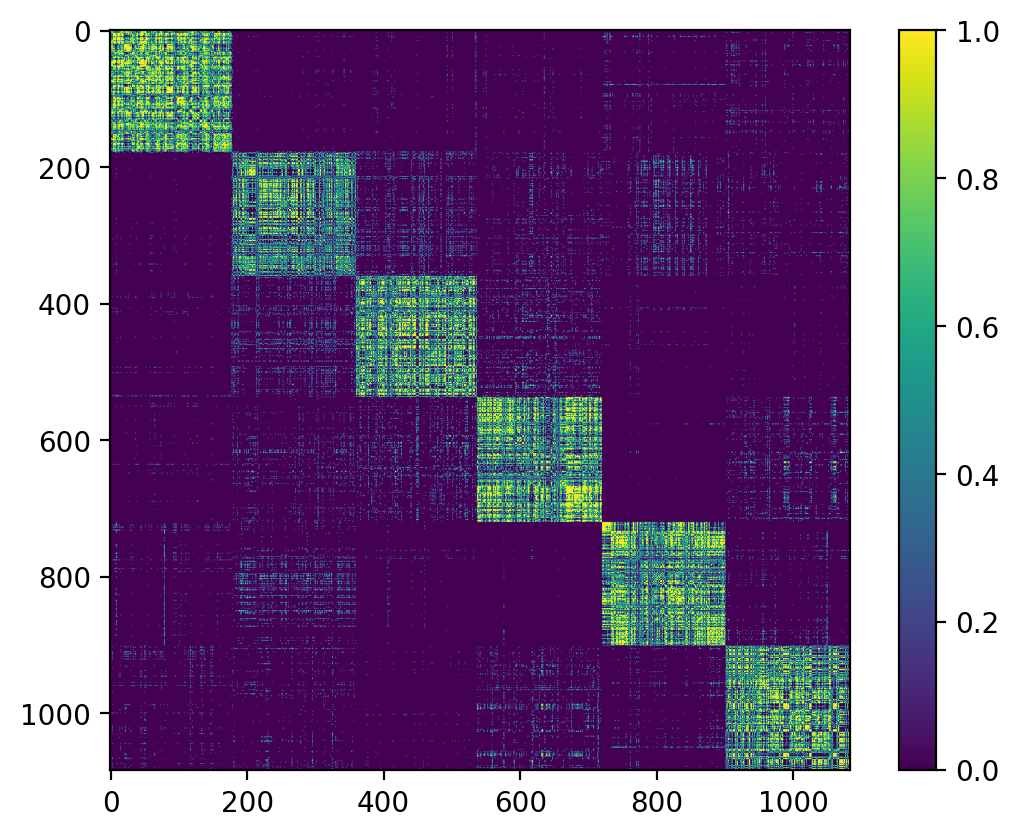

In [24]:
# Plot the affinity matrix
ind_y_ord = np.argsort(y)
plt.imshow(spectral.affinity_matrix_.toarray()[ind_y_ord][:,ind_y_ord])
plt.colorbar()

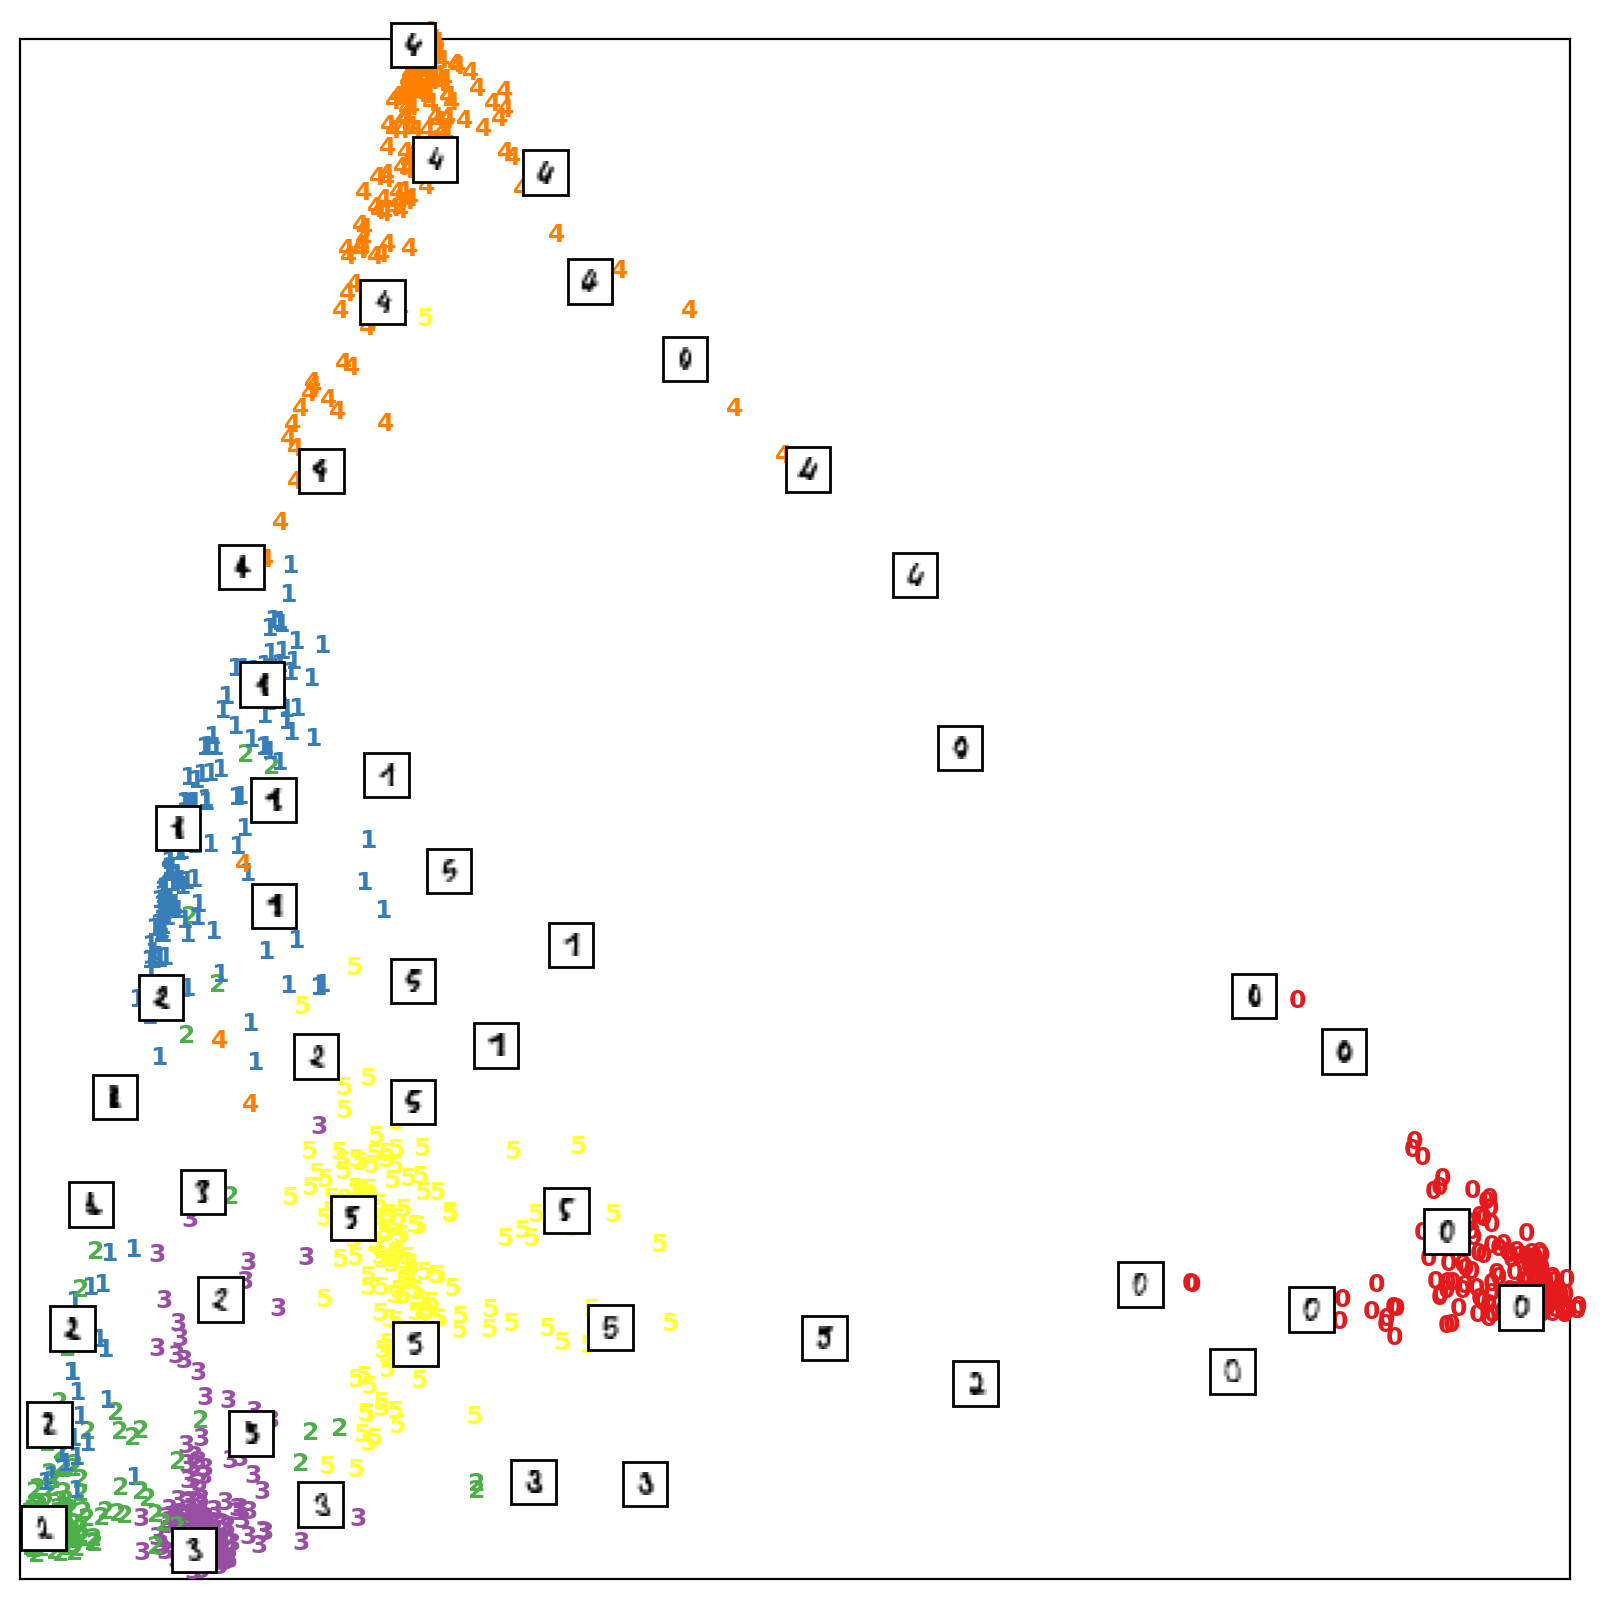

In [25]:
# Plot Kmeans embedding
plt.figure(figsize=(10,10))
plot_embedding(X_spectral, y, digits)

Vemos como esta transformación nos proporciona el embedding más discriminativo (de manera no supervisada) obtenido hasta el momento y como se preservan las distancias del espacio original en el nuevo espacio. Por ejemplo, vemos que los "3" están cerca de los "2" y "5", "4" está cerca de "1" y el "0" está lejos de todos.

Si directamente aplicamos esta transformación al clasificador K-NN...


In [26]:
# Split into a training and testing set
X_spectral_train, X_spectral_test, Y_train, Y_test = train_test_split(X_spectral, y, test_size=0.6)
scaler = StandardScaler().fit(X_spectral_train)
X_spectral_train = scaler.transform(X_spectral_train)
X_spectral_test = scaler.transform(X_spectral_test)

# CV with GridSearchCV
grid_spectral = GridSearchCV(neighbors.KNeighborsClassifier( ), param_grid, cv=5)
grid_spectral.fit(X_spectral_train, Y_train)

# Test
accuracy_train_knn = grid_spectral.score(X_spectral_train,Y_train)
accuracy_test_knn = grid_spectral.score(X_spectral_test,Y_test)

accuracy_test_knn

0.9261538461538461

Vemos que con solo dos variables ya tenemos prestaciones del 90%.

# Embeddings con redes neuronales: word2vec

Word2vec es un algoritmo inventado en Google para diseñar *embeddings* de palabras. Word2vec se basa en la premisa de que palabras con significado similar deben ser codificadas con vectores geométricamente cercanos. Para ello se considera que las palabras que suelen tener las mismas palabras vecinas (contexto) tienden a ser semánticamente similares. Tanto "perro" como "gato" aparecen con frecuencia cerca de la palabra "veterinario", y este hecho refleja su similitud semántica.

Hay diferentes esquemas para construir un word2vec, aquí vamos a ver el modelo más común que es el Skip-Gram.

## Modelo Skip-Gram

Supongamos que se tiene una ventana deslizante de tamaño fijo que se desplaza a lo largo de una frase: la palabra del centro es el **objetivo** y las que están a su izquierda y derecha dentro de la ventana deslizante son las palabras de **contexto**.

Consideremos el siguiente ejemplo donde usamos una ventana de tamaño 5 para ir construyendo nuestras muestras de entrenamiento con pares de palabras (objetivo, contexto):

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/Embeddings/word2vec1.png" width="80%">

A partir de este conjunto de datos, el modelo Skip-Gram se entrena para predecir las probabilidades de que una palabra sea el contexto de un determinado objetivo. Para ello utiliza una DNN con la siguiente arquitectura:


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/Embeddings/word2vec3.png" width="80%">

Las palabras objetivo ($x_1$, ..., $x_v$) están a la entrada de la red con una codificación one-hot. Las palabras contexto ($y_1$, ..., $y_v$) son el objetivo y están a la salida también con una codificación one-hot. De este modo la red, para cada par (objetivo, contexto), debe predecir el contexto de la palabra objetivo. Para ello, la red tiene una capa intermedia que permite modelar el contexto a partir del objetivo. El tamaño de esta capa ($N$) define el tamaño o dimensión de nuestro embedding; para procesado de texto suelen usarse embeddings de tamaño 100, 200,... aunque lógicamente esto depende de la complejidad de la base de datos.

Usando así el conjunto de entrenamiento que generamos con el corpus de datos, se entrenará la red y se aprenderán los parámetros de red dados por las matrices de entrada $W$ y la de salida $W'$. Mientras que la matriz de salida codifica el contexto, la matriz de entrada (denominada *embedding*) nos da una representación en un espacio de tamaño $N$ de cada una de las palabras objetivo en nuestro corpus.



## Implementación de word2vec en Gensim

Para diseñar un word2vec podemos usar la implementación de  [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) que incluye la librería de gensim. Su uso es bastante sencillo ya que sólo necesita que le facilitemos una colección de frases (él se encarga de generar por nosotros los pares de palabras (objetivo, contexto)) y solo hay que indicarle algunos parámetros:
* `size` (tamaño del embedding): el número de dimensiones que tendrá su representación vectorial. Por defecto es 100.
* `window` (tamaño de la ventana): el número de palabras adyacentes que se consideran en el mismo contexto de una palabra objetivo. Por defecto es 5.
* `sg` (algoritmo word2vec). Debemos indicar `sg=1` si queremos usar el skip-gram.
* `min_count`: mínimo número de veces que debe aparecer una palabra en el corpus para ser considerada en el modelo.



**Carga de datos**

Para empezar a trabajar con este modelo vamos a empezar utilizando uno de los datasets de NLTK. En este caso elegimos el dataset *brown* que contiene 500 fuentes de texto clasificadas por género (noticias, ficción, misterio, comedia, ...). Además, para poder trabajar con este corpus, vamos a dividirlo por frases, para luego analizar las palabras de cada frase y su contexto.

In [27]:
import nltk
from nltk.corpus import brown

nltk.download('brown')
corpus_sent = brown.sents(categories=['news']) # To fast the word2vec training let's only use news category

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Aqui vamos a usar un dataset tal y como está, pero podríamos lógicamente aplicar todo el preprocesado que hemos visto con NLTK para mejorar el resultado del *embedding* que calculemos.

**Definición y entrenamiento del modelo**

Ahora vamos a usar la clase [`word2Vec`](https://radimrehurek.com/gensim/models/word2vec.html) de gensim para generar y entrenar el modelo, es decir, para aprender el *embedding* de cada uno de los términos de nuestro corpus.

In [28]:
import gensim
gensim.__version__

'4.3.1'

In [29]:
from gensim.models import Word2Vec
model = Word2Vec(corpus_sent, sg=1, vector_size = 50, window=5, min_count=20)
print(model)

Word2Vec<vocab=550, vector_size=50, alpha=0.025>


Una vez tenemos el modelo word2vec, podemos ver el vocabulario del mismo (las palabras consideradas como objetivo para las que tendremos un *embedding*)

In [30]:
words = list(model.wv.index_to_key)
print(words)

['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'The', 'that', '``', 'is', 'was', "''", 'on', 'at', 'with', 'be', 'by', 'as', 'he', 'said', 'his', 'will', 'it', 'from', 'are', ';', 'has', 'an', '--', 'had', 'who', 'have', 'not', 'Mrs.', 'were', 'this', 'would', 'which', 'their', 'been', 'they', 'He', 'one', 'I', 'its', 'but', 'or', ')', 'more', 'Mr.', '(', 'up', 'all', 'last', 'out', 'two', ':', 'other', 'new', 'first', 'year', 'than', 'A', 'about', 'there', 'when', 'after', 'In', 'home', 'also', 'over', 'It', 'into', 'no', 'But', 'made', 'only', 'her', 'years', 'three', 'time', 'them', 'some', 'him', 'can', 'New', 'state', '?', 'any', 'President', 'could', 'before', 'week', 'under', 'against', 'we', 'now', 'what', 'most', 'if', 'off', 'four', 'man', 'House', 'This', 'such', 'back', 'members', 'here', 'so', 'American', 'program', 'work', 'Kennedy', 'may', 'get', 'school', 'John', 'night', 'do', 'did', 'State', 'meeting', 'They', 'day', 'since', 'each', 'per', 'many', 'should', '

Así como cada uno de los *embeddings* para cada una de estas palabras

In [31]:
model.wv['Friday']

array([ 0.01639417, -0.15593153, -0.22390512,  0.09059329, -0.25432545,
       -0.09052788,  0.2250382 ,  0.31904766, -0.2624152 , -0.04357721,
        0.2000503 , -0.29752034,  0.28194466,  0.0845525 , -0.09239875,
       -0.04290073, -0.02070902, -0.05138558, -0.29774556, -0.30724892,
       -0.05189294,  0.10533728,  0.14818496,  0.18157704,  0.05765126,
       -0.08464772, -0.07894697,  0.07502756, -0.12233995, -0.01595388,
        0.08880612, -0.05903665, -0.04237607,  0.10590537, -0.06914134,
       -0.05396285,  0.34624124, -0.00810425, -0.04849019, -0.14989385,
        0.1101994 ,  0.05809606, -0.10601384,  0.13043508,  0.428169  ,
       -0.00467138,  0.1508605 , -0.14606586,  0.06386386,  0.13804735],
      dtype=float32)

## Visualización de Word2Vec: t-SNE

Para visualizar el word2vec anterior necesitamos convertir cada *embedding* (tiene dimensión 50) a un espacio bidimensional. Un opción para reducir su dimensión es aplicar un PCA. Sin embargo, para la representación de los word2vec suele usarse el algoritmo [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (*t-distributed Stochastic Neighbor Embedding*) ya que es capaz de mantener la estructura semántica o local de los datos.

Para ello, el t-SNE aplica una reducción de dimensionalidad no lineal para modelar cada *embedding* de alta dimensión mediante un punto bidimensional o tridimensional, de manera que los objetos similares se modelen mediante puntos cercanos y los objetos disímiles se modelen mediante puntos distantes.

Sklearn incluye una implementación del [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) que podemos usar fácilmente.

In [32]:
# Create numpy array with all word2vec
embeddings = model.wv.vectors
#embeddings = np.array([model.wv[w] for w in list(model.wv.vocab)])
embeddings[0,:]

array([-0.01137864, -0.05047423, -0.0556312 ,  0.24418059, -0.36013108,
       -0.10297173,  0.27621353,  0.35397512, -0.3042764 ,  0.02695749,
        0.299541  , -0.22492474,  0.16050214,  0.1488754 , -0.21356572,
       -0.12055362,  0.02678637,  0.05291437, -0.35336903, -0.1988936 ,
       -0.07895456,  0.15461412,  0.16771646,  0.14057505,  0.13030085,
       -0.12918061,  0.06674655,  0.08601151, -0.20811634, -0.01872322,
        0.01411802, -0.11317168, -0.00696876,  0.04538812, -0.11037275,
        0.11554606,  0.50226283, -0.06336784, -0.04285435, -0.0799165 ,
       -0.00804743,  0.16538452, -0.28324854,  0.00544394,  0.4135309 ,
       -0.0157636 ,  0.15795754, -0.13279028,  0.0353037 ,  0.17013821],
      dtype=float32)

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings)

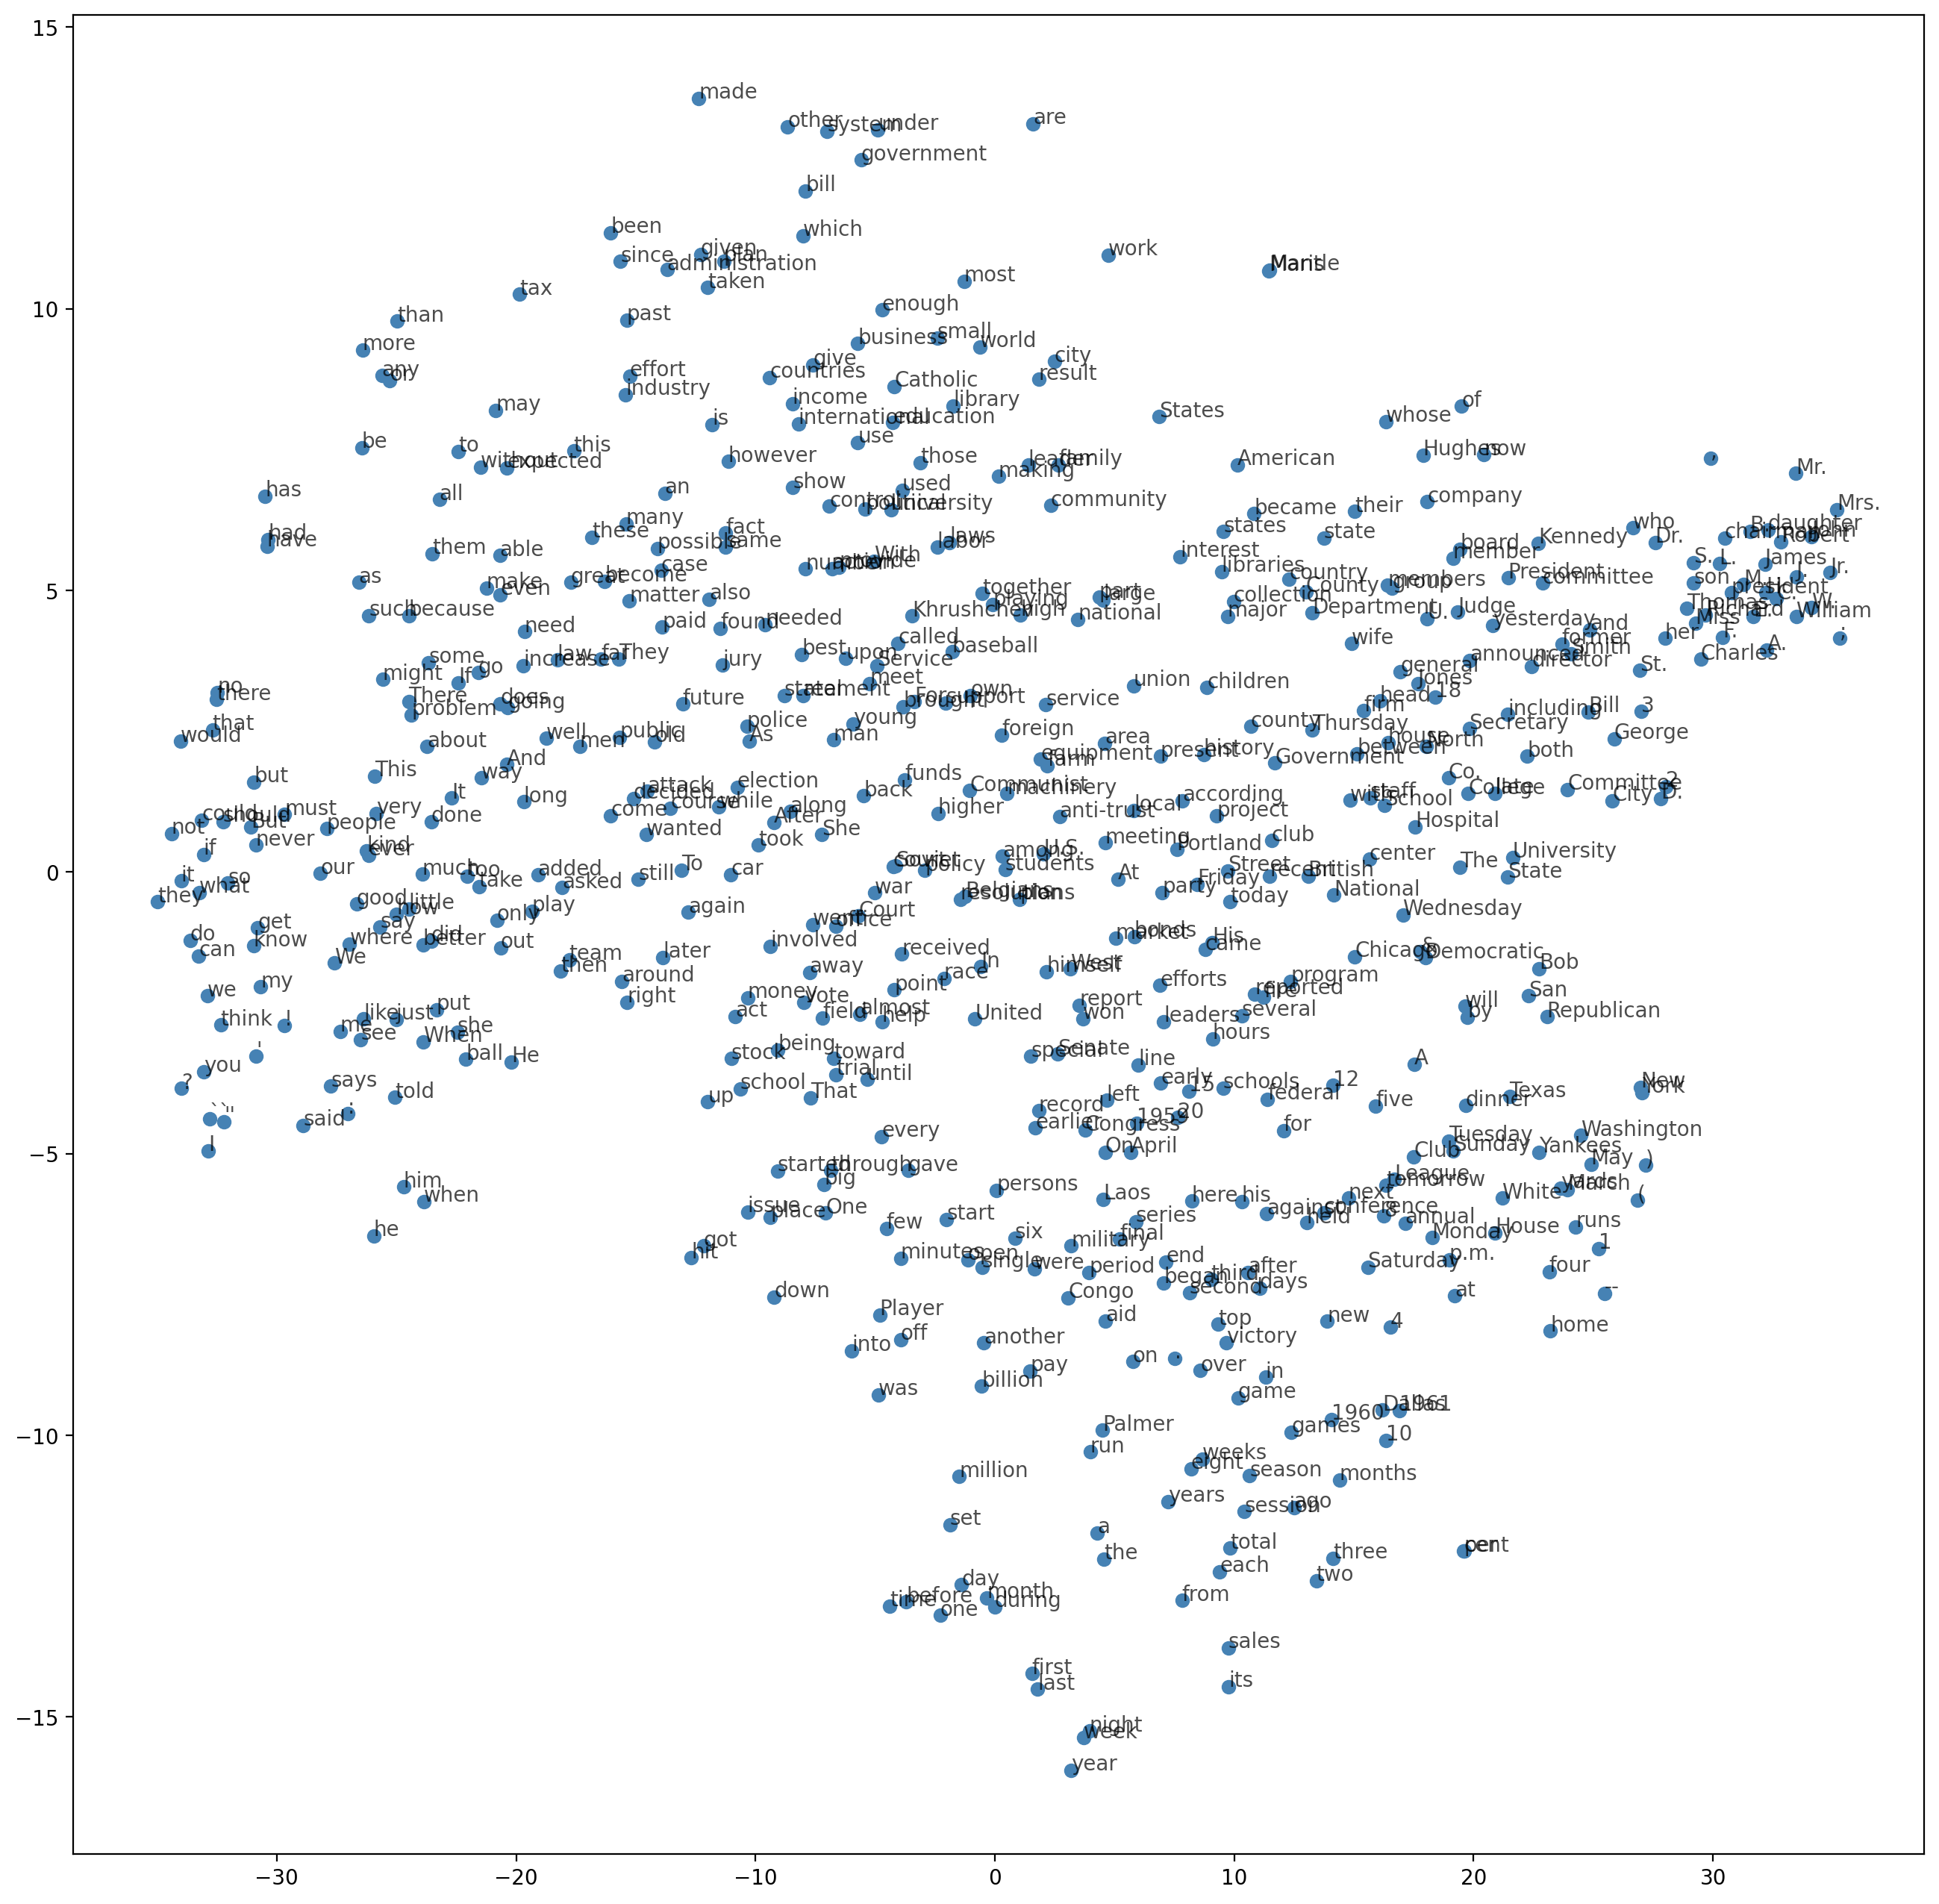

In [34]:
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((model.wv.index_to_key)):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

## Usando modelos preentrenados

Gensim incluye funciones para explotar un conjunto de *embeddings* preentrenados. Pueden ser un conjunto de *embeddings* que hemos entrenado nosotros, o puede utilizar directamente un modelo preentrenado con un gran corpus de datos. Muchos de ellos están disponibles en abierto para su uso.

Un modelo preentrenado muy popular es el modelo del conjunto de datos de Google News, que contiene *embeddings* de dimensión 300 para un vocabulario de 3 millones de palabras. La siguiente celda de código carga este modelo (tarda un poco...)

In [35]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')


Una vez cargado el modelo, el acceso a los embeddings es muy sencillo:


In [36]:
# Access vectors for specific words with a keyed lookup:
vector = wv['sports']
# see the shape of the vector (300,)
vector.shape

(300,)

In [37]:
# Processing a sentence
vectors = [wv[x] for x in "This is some text I am processing".split(' ')]

len(vectors)

7

Gensim incluye funciones para explorar los vectores de *embedding* cargados que nos permiten examinar la similitud de las palabras y encontrar sinónimos de palabras:

In [38]:
wv.similarity('baseball','football')   # similitud -- distancia coseno sobre los embeddings

0.6162001

In [39]:
wv.similarity('baseball','stomach')

-0.015564232

In [40]:
wv.most_similar('neck')

[('ankles', 0.6382889747619629),
 ('necks', 0.6107644438743591),
 ('wrists', 0.6104507446289062),
 ('chest', 0.6057026982307434),
 ('forearm', 0.6037589907646179),
 ('thigh', 0.5856353044509888),
 ('C7_vertebra', 0.5850889086723328),
 ('bruises_contusions', 0.5672100782394409),
 ('leg', 0.5608325004577637),
 ('rib_cage', 0.5597514510154724)]

También podemos visualizar (algunas palabras) de este *embedding* usando el t-SNE

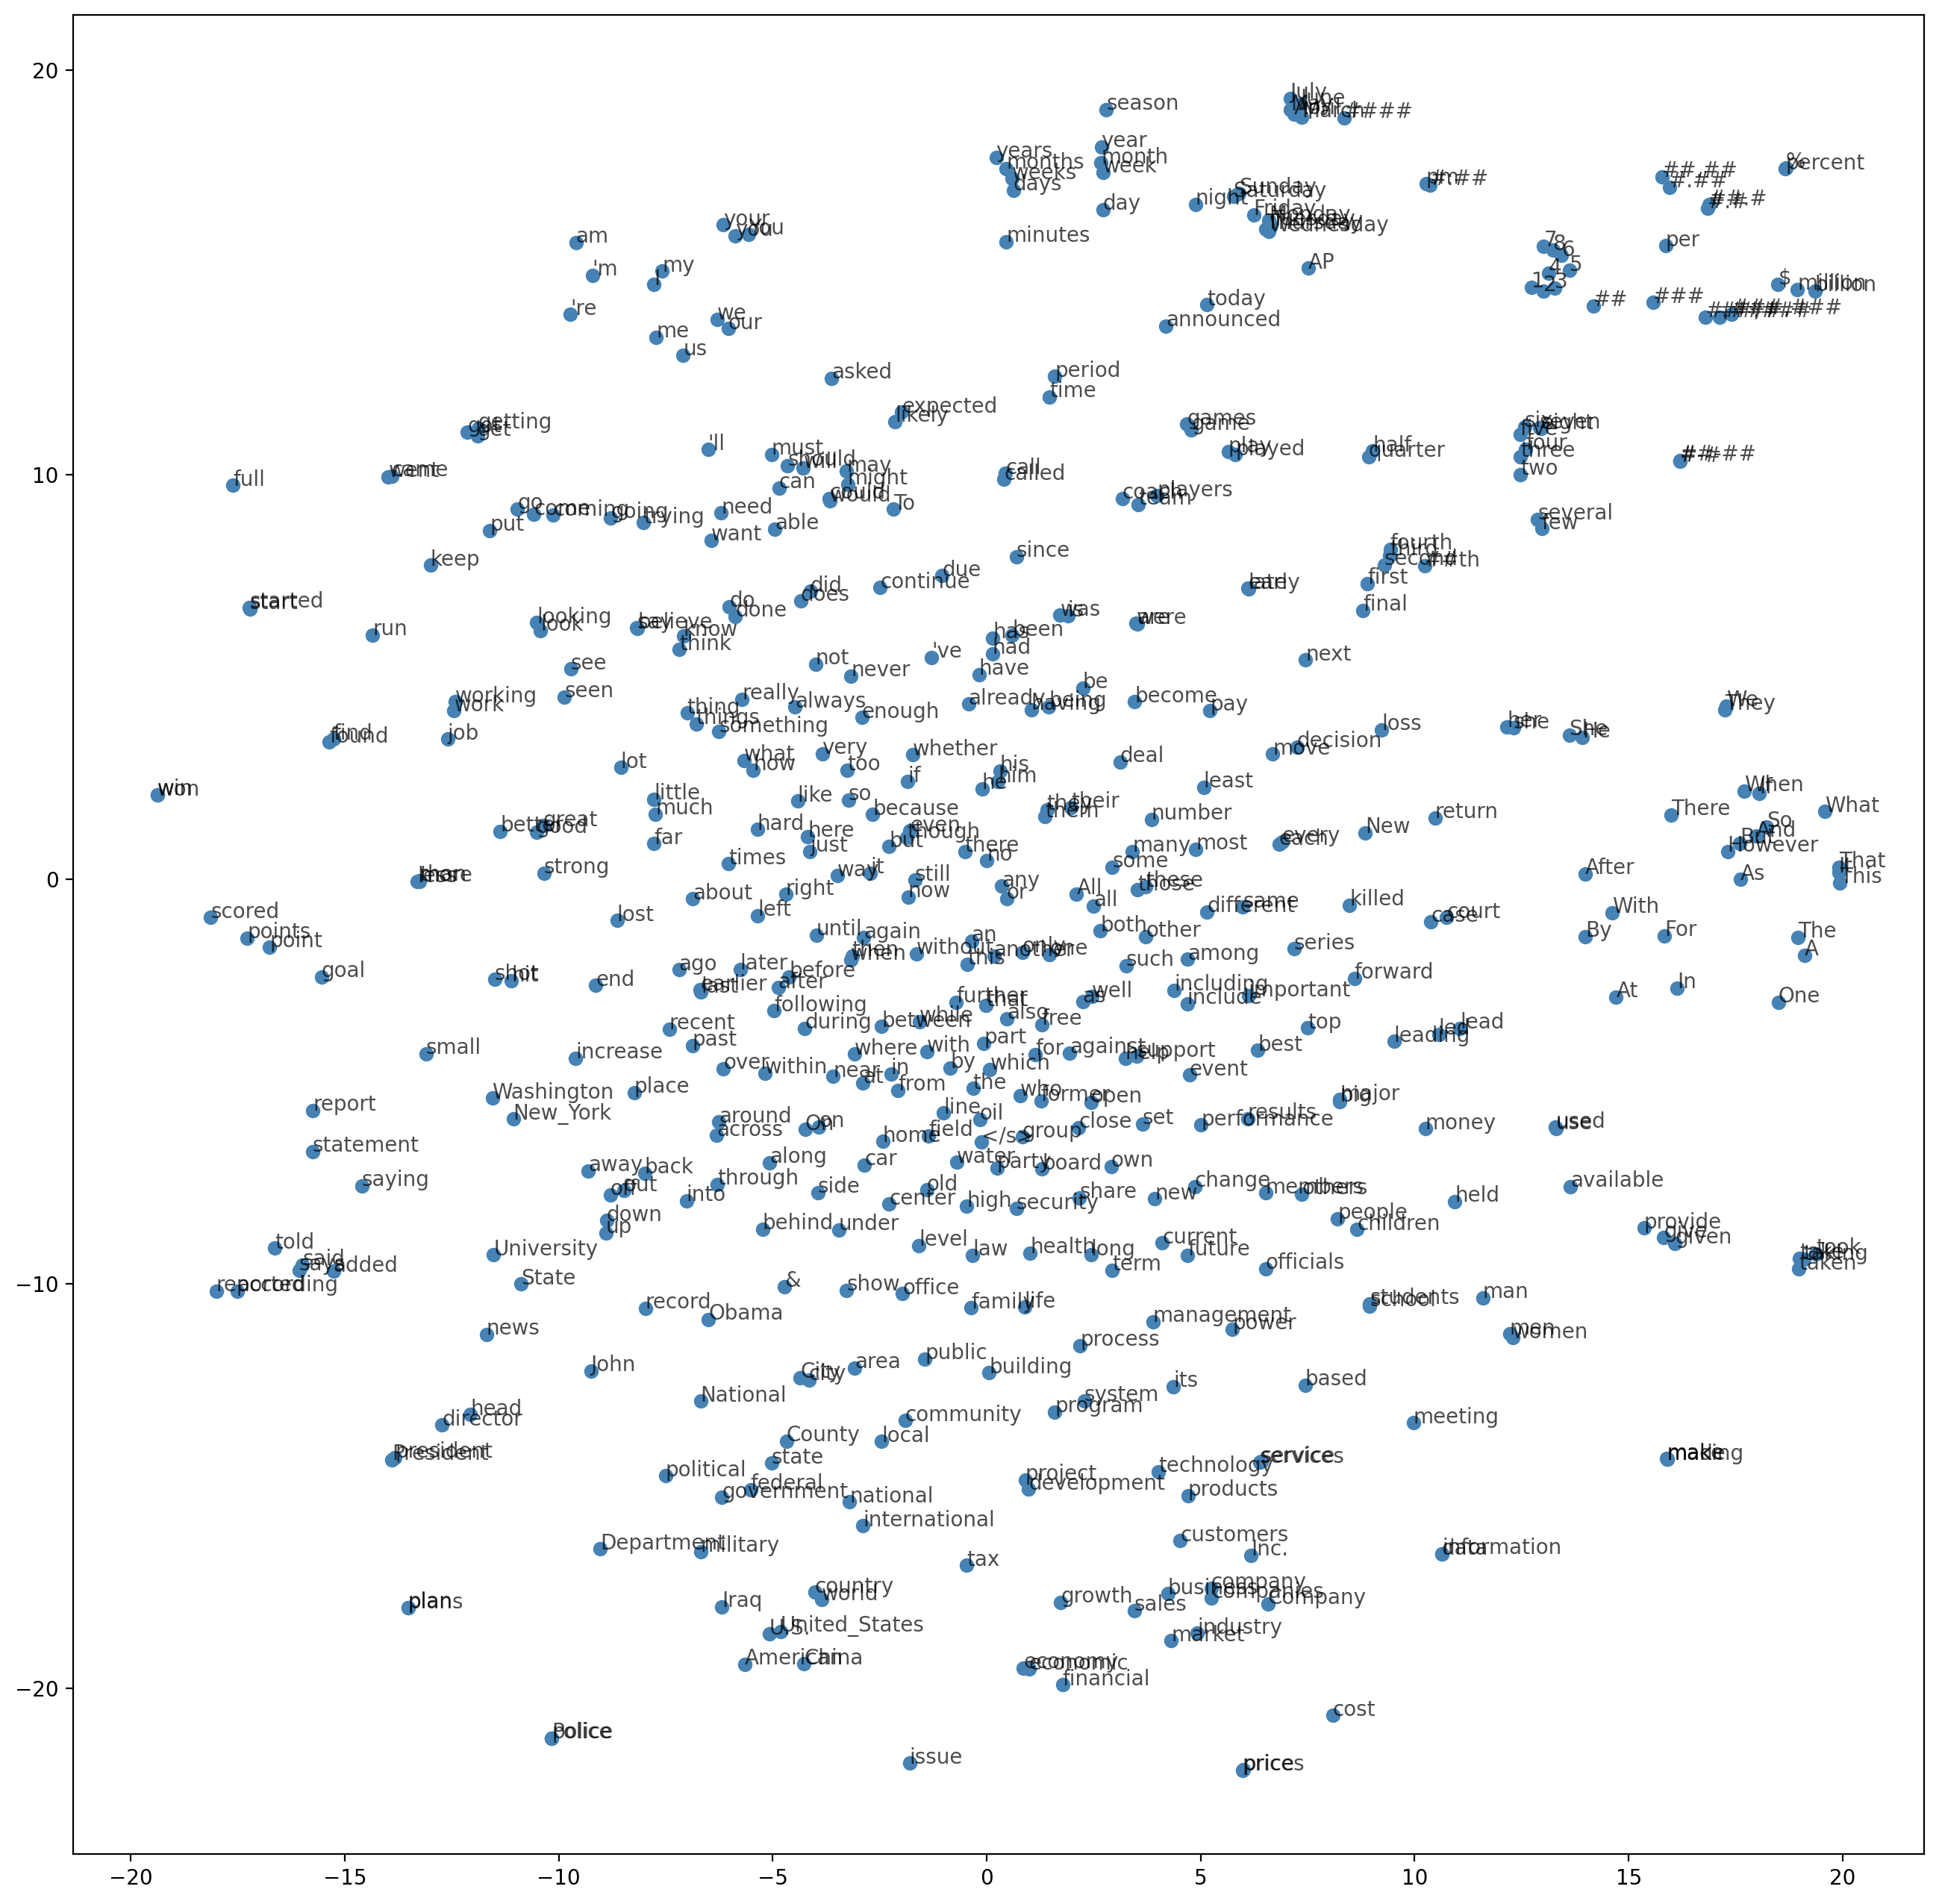

In [41]:
from sklearn.manifold import TSNE
# Let's plot only 500 words of the vocab
vocab = list(wv.index_to_key)
embeddings_red = np.array([wv[w] for w in vocab[:500]])

tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings_red)

fig, ax = plt.subplots(figsize=(16, 16))
for idx, w in enumerate(vocab[:500]):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(w, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

## Operaciones semánticas con *embeddings*
Para analizar cómo el word2vec es capaz de mantener las relaciones semánticas entre palabras, vamos a hacer un experimento curioso. Vamos a obtener los *embeddings* de las siguientes palabras ...

In [42]:
king = wv['king']
queen = wv['queen']
man = wv['man']
woman = wv['woman']

Si buscamos los vecinos más cercanos (utilizando la distancia del coseno) a la palabra 'king' obtenemos

In [43]:
wv.similar_by_vector(king, topn=10)

[('king', 1.0),
 ('kings', 0.7138044834136963),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646551847457886),
 ('Prince_Paras', 0.543294370174408)]

Si ahora calculamos el vector

In [44]:
v = king - man + woman  # NO ES UNA PALABRA, ES UN VECTOR INTERMEDIO EN EL ESPACIO DE LOS EMBEDDINGS

¿Qué esperas de la palabra resultante? Busquemos las palabras más parecidas con el vector resultante

In [45]:
wv.similar_by_vector(v, topn=10, restrict_vocab=None)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

Curiosamente, **la similitud con el vector `queen` ha aumentado** Es decir, hemos realizado una operación semántica (`king - man + woman -> queen`) mediante operaciones euclidianas en el espacio de los *embeddings*.

De hecho, la operación puede generalizarse simplemente a

 v = `king` + $\alpha$ ( - `man` + `woman`)

donde utilizando $\alpha>1$. En el siguiente código calculamos la correlación entre v y `queen` para diferentes valores de $\alpha$.

In [46]:
def cos_dist(v1,v2):
    return (v1@v2)/np.linalg.norm(v1)/np.linalg.norm(v2)

alpha = np.arange(0,6,0.25)
vectors = [king+a*(woman-man) for a in alpha]

corr_queen = np.array([cos_dist(v,queen) for v in vectors])
corr_king = np.array([cos_dist(v,king) for v in vectors])
most_corr_word = [wv.similar_by_vector(v, topn=1, restrict_vocab=None)[0][0] for v in vectors]

En el siguiente gráfico mostramos la similitud entre el vector resultante con `king` y `queen`, resaltando con puntos negros los casos en los que `queen` es la palabra más parecida a `king`.

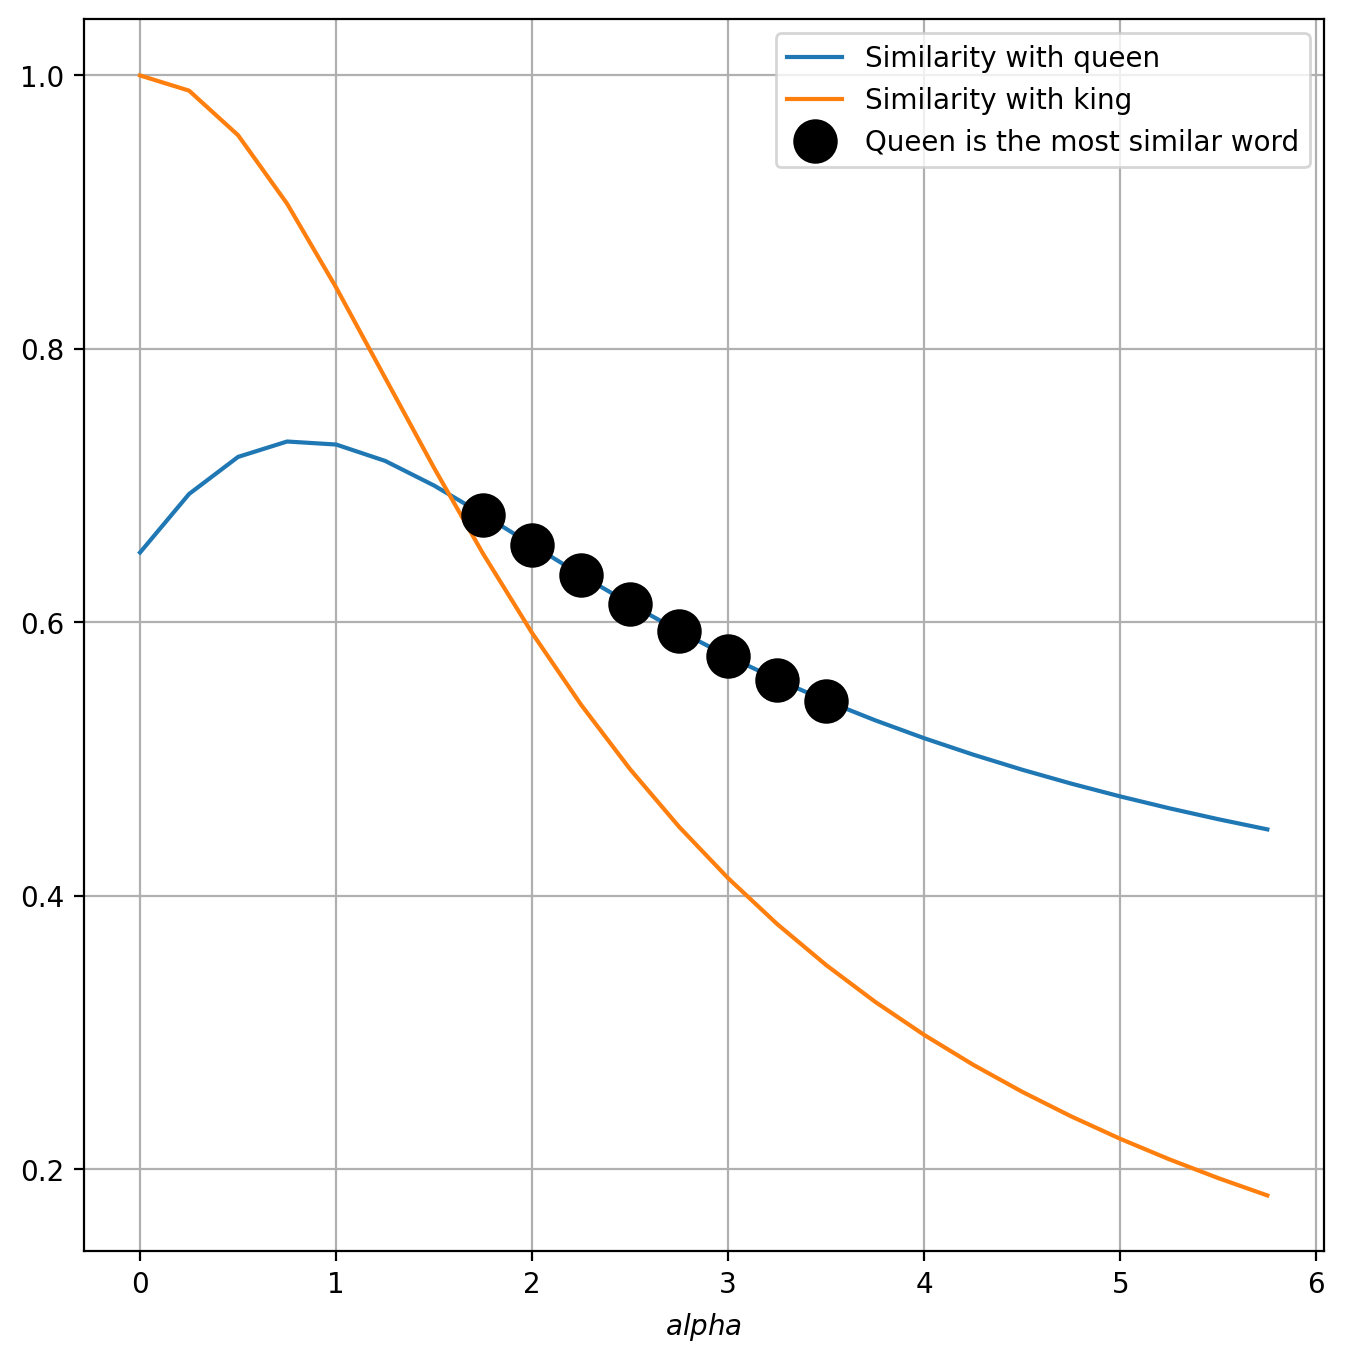

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(alpha,corr_queen,label='Similarity with queen')
plt.plot(alpha,corr_king,label='Similarity with king')
idx_queen = [w == 'queen' for w in most_corr_word]
plt.plot(alpha[idx_queen],corr_queen[idx_queen],'ko',ms='15',label='Queen is the most similar word')
plt.legend()
plt.xlabel('$alpha$')
plt.grid()

Así que, efectivamente, con operaciones lineales sobre el espacio de *embeddings* podemos resolver algunas operaciones semánticas sencillas.

In [48]:
clear wv

# *Embeddings* para sistemas de recomendación: Prod2Vec

Los sistemas de recomendación consisten en hacer predicciones sobre los intereses de un usuario basándose en los intereses de muchos otros usuarios. Así, por ejemplo, en un sistema de recomendación de películas, supongamos que tenemos 1.000.000 de usuarios y una lista de las películas que ha visto cada uno (de un catálogo de 500.000 películas). Nuestro objetivo es recomendar películas a los usuarios.

Para resolver este problema se necesita algún método para determinar qué películas son similares entre sí. Podemos lograr este objetivo obteniendo un *embedding* las películas en un espacio de baja dimensión creado de forma que las películas similares estén cerca. Para ello podemos usar las mismas ideas y herramientas del word2vec para obtener embeddings de palabras, por ese motivo esta aproximación se llama Prod2Vec...

Veamos como obtener este Prod2Vec para un sistema de recomendación de productos de la compra$^{(*)}$. Para ello, empecemos cargando el siguiente dataset.

$^{(*)}$ Este dataset es una versión simplificada del challenge "*Instacart market basket analysis*" de [Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis)

In [49]:
product_df = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/market_basket/products.csv")
order_product_df = pd.read_csv("http://www.tsc.uc3m.es/~vanessa/data_notebooks/market_basket/market_basket_red_v2.zip").set_index('Unnamed: 0')


En este dataset tenemos dos tablas de datos, por un lado la que nos indica los productos disponibles (indica lo que es cada `product_id`)

In [50]:
product_df

product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3            38              1  
4             5             13  
...         ...            ...  
49683       124              5  
49684        42              1  
49685       112              3  
49686        41              8  
49687        73             11  

[49688 rows x 4 columns]

Y por otro lado, la tabla con pedidos, para cada compra nos indica los productos que se han comprado y, además, van ordenados. Es decir, nos indica la secuencia de compra de productos...

In [51]:
order_product_df.head()

order_id  product_id  add_to_cart_order  user_id
Unnamed: 0                                                  
0                  5       13176                  1   156122
1                  5       15005                  2   156122
2                  5       47329                  3   156122
3                  5       27966                  4   156122
4                  5       23909                  5   156122

### Construcción del Prod2Vec

Podemos explotar la estructura secuencial que nos da la tabla `order_product_df` para ver qué productos suelen acompañarse de otros, es decir, para definir el contexto de cada producto. Para ello, solo tenemos que crear estructuras tipo frases con el orden en que se compran los productos dentro del mismo pedido.

In [52]:
order_product_list = order_product_df[['order_id','product_id']].values.tolist()

product_corpus = []
sentence = []
new_order_id = order_product_list[0][0]
for (order_id, product_id) in order_product_list:
    if new_order_id != order_id:
        product_corpus.append(sentence)
        sentence = []
        new_order_id = order_id
    sentence.append(str(product_id))


Analicemos el contenido de estas listas

In [53]:
# Function to help to analyze products
def toProductName(id):
    id = int(id)
    return product_df[product_df.product_id==id]['product_name'].values.tolist()[0]
toProductName(24852)

'Banana'

In [54]:
# Primera frase o primera lista de la compra
id_list = 0
list_products = [toProductName(id_prod) for id_prod in product_corpus[id_list]]
print(list_products)

['Bag of Organic Bananas', 'Just Crisp, Parmesan', 'Fresh Fruit Salad', 'Organic Raspberries', '2% Reduced Fat Milk', 'Sensitive Toilet Paper', 'Natural Artesian Water, Mini & Mobile', 'Matzos, Thin, Tea', 'Boneless Skinless Chicken Breast Fillets', 'Mini Original Babybel Cheese', 'Macaroni And Cheese', 'Clementines', "Biscuits Orange Pim's", 'Dairy Milk Fruit & Nut Chocolate Bar', 'Artichokes', 'Apricot Preserves', 'One Ply Choose A Size Big Roll Paper Towel Rolls', 'Wafer, Chocolate', 'French Lavender Hand Wash', 'American Slices Cheese', 'Everyday  Facial Tissues', 'Organic Hass Avocado', 'Spaghetti Pasta', 'Meyer Lemon', 'Bag of Organic Lemons', 'Original Black Box Tablewater Cracker']


In [55]:
# Segunda frase o segunda lista de la compra
id_list = 1
list_products = [toProductName(id_prod) for id_prod in product_corpus[id_list]]
print(list_products)

['100% Recycled Paper Towels', 'Red Vine Tomato', 'Apricots', 'Watermelon Chunks', 'Organic Fat Free Milk', 'Sparkling Water Grapefruit', 'Organic Bosc Pear', 'Organic Raspberries', 'Organic Stage 4 Spinach Mango & Pear Baby Food', 'Ataulfo Mango', 'Globe Eggplant', 'Organic Unsalted Butter', 'Sesame Oil, Pure', 'Frozen Broccoli Florets', 'Organic Maple & Onion Baked Beans', 'Pear Kiwi & Kale Baby Food', 'Organic Fiber & Protein Pear Blueberry & Spinach Baby Food', 'Cilantro Pesto', 'Raspberry Preserves', 'Balsamic Reduction Traditional Balsamic', 'Pitted Prunes', 'Sweet Corn On The Cob', 'Organic Hazelnut Spread', 'Organic Baby Kale', 'Low Sodium Bacon', 'Asparagus', 'Organic Avocado', 'Basil, Asiago & Pine Nut Pesto Ravioli']


Ahora que tenemos nuestro "corpus" de productos o listas de la compra, podemos usar la función `word2vec` de gensim para construir un `prod2vec`

In [56]:
from gensim.models import Word2Vec
model = Word2Vec(product_corpus, window=6, vector_size=100, min_count=200)


### ¿Cuáles son los productos más parecidos?

Podemos usar la representación prod2vec o los *embeddings* de los productos para encontrar productos similares:

* El producto más parecido a `banana` (24852) es ..

In [57]:
def most_similar_readable(model, product_id):
    similar_list = [(product_id,1.0)]+model.wv.most_similar(str(product_id))

    return [( toProductName(int(id)), similarity ) for (id,similarity) in similar_list]

In [58]:
pd.DataFrame(most_similar_readable(model, 24852), columns=['product','similarity'])

product  similarity
0                                 Banana    1.000000
1                 Bag of Organic Bananas    0.714383
2                         Organic Banana    0.512889
3                         Bartlett Pears    0.425864
4                  Total 0% Greek Yogurt    0.401593
5       XL Emerald White Seedless Grapes    0.393429
6                              Bosc Pear    0.385819
7                    Granny Smith Apples    0.353179
8               Pink Lady (Cripps) Apple    0.352782
9        100% Lactose Free Fat Free Milk    0.352212
10  Kefir Cultured Strawberry Milk Drink    0.347206

* El producto más parecido a `Organic Whole Milk` (27845) es ..

In [59]:
pd.DataFrame(most_similar_readable(model, 27845), columns=['product','similarity'])

product  similarity
0                    Organic Whole Milk    1.000000
1              Organic Reduced Fat Milk    0.623852
2                Organic Lowfat 1% Milk    0.539423
3            Whole Organic Omega 3 Milk    0.535353
4          Organic Whole Grassmilk Milk    0.514751
5      Lactose Free 2% Reduced Fat Milk    0.514453
6        Organic Mini Homestyle Waffles    0.508910
7        Organic Homogenized Whole Milk    0.508399
8   Organic Whole Milk with DHA Omega-3    0.497423
9      Organic Reduced Fat Omega-3 Milk    0.495186
10                           Whole Milk    0.492533

### Aplicaciones del prod2vec: agrupamiento de productos

Podemos usar la representación prod2vec para hacer agrupamiento de productos usándola como entrada de un K-means. Para ello vamos a entrenar un k-means con 500 grupos.

In [60]:
from sklearn.cluster import KMeans

K=500

# Get product embeddings and normalize to 1 (to use cosine distance)
prod_emb = model.wv.vectors
prod_emb = (prod_emb.T/ np.linalg.norm(prod_emb, axis=1)).T
# Train Kmeans
kmeans = KMeans(n_clusters=K) # Definimos objeto con parámetros por defecto
kmeans.fit(prod_emb) # Entrenamos k-means
y_kmeans = kmeans.predict(prod_emb) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Analicemos los clusters resultantes, para ello podemos ver los productos más parecidos a cada centroide

In [61]:
def most_similar_to_centroid(model, center_emb):
    similar_list = model.wv.similar_by_vector(center_emb)

    return [( toProductName(int(id)), similarity ) for (id,similarity) in similar_list]

In [62]:
center_id = 0
pd.DataFrame(most_similar_to_centroid(model, centers[center_id]), columns=['product','similarity'])

product  similarity
0                  Cut Okra    0.881421
1          Vegetable Medley    0.846170
2     Long Grain Brown Rice    0.827759
3           Chopped Spinach    0.826517
4           Cut Green Beans    0.808759
5                Green Peas    0.796357
6     Long Grain White Rice    0.763754
7  Green Peas No Salt Added    0.759944
8              Red Potatoes    0.710207
9   Petite Brussels Sprouts    0.708476

In [63]:
center_id = 100
pd.DataFrame(most_similar_to_centroid(model, centers[center_id]), columns=['product','similarity'])

product  similarity
0           Free & Clear All-Purpose Natural Cleaner    0.913484
1           2-Ply 100% Recycled White Facial Tissues    0.885629
2        2-Ply Right Size 100% Recycled Paper Towels    0.884177
3                        All Natural Powder Cleanser    0.858953
4                  Natural Glass and Surface Cleaner    0.841567
5                   100% Recycled White Paper Towels    0.841242
6  4X Ultra Concentrated Natural Laundry Detergen...    0.830956
7             All One Hemp Lavender Castile Soap Bar    0.824144
8         Disinfecting Wet Wipes - Lemongrass Citrus    0.813707
9       Dishmate Ultra Grapefruit Dishwashing Liquid    0.813440

In [64]:
center_id = 200
pd.DataFrame(most_similar_to_centroid(model, centers[center_id]), columns=['product','similarity'])

product  similarity
0                 Peanut Butter Whole Grain Clusters    0.921910
1  Vanilla Blueberry Clusters With Flax Seeds Gra...    0.911702
2         Healthy Grains Fiber Cinnamon Oat Clusters    0.898897
3  Healthy Grains Oats & Honey Clusters with Toas...    0.895930
4                         Vanilla Almond Fit Granola    0.884759
5               Maple Quinoa Cluster With Chia Seeds    0.875056
6  Fruit & Nutty Almonds Raisins Cranberries Peca...    0.856648
7           Go Lean Crunch! Honey Almond Flax Cereal    0.826343
8  Chocolate Almond & Sea Salt with Chia Granola ...    0.715413
9                          Gluten Free Foods Granola    0.708200